### <font color ='darkred'>Análise Estatística Para Data Science com Linguagem Python - Michelle Bouhid </font>

#### <font color ='darkblue'>Automatizando a Validação das Suposições da Regressão Linear</font>

#### <font color ='darkgreen'>Mini-Projeto - Quais fatores mais influenciam na taxa de ocupação de residências?</font>

<font color= darkred > <b> Instalando e carregando os pacotes </b> </font>

In [1]:
# Versão Python
from platform import python_version
print( 'Versão Python:', python_version())

Versão Python: 3.9.13


In [2]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# !pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
!pip install -q -U watermark

In [3]:
# Imports para manipulação de dados
import numpy as np
import pandas as pd

# Imports para visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Imports para modelagem estatística
import pylab
import scipy #Pacote pra matematica
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.regression.linear_model as smf
import statsmodels.stats.api as sms
from scipy.stats import pearsonr
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.compat import lzip

# Import para divisão dos dados
import sklearn
from sklearn.model_selection import train_test_split

# Import para padronização dos dados
from sklearn.preprocessing import StandardScaler

In [4]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Michelle Bouhid" --iversions

Author: Michelle Bouhid

sklearn    : 1.0.2
matplotlib : 3.5.2
pandas     : 1.4.4
scipy      : 1.9.1
seaborn    : 0.11.2
statsmodels: 0.13.2
numpy      : 1.22.2



<font color= darkred > <b> Carregando os Dados e definindo a Variavel Alvo </b> </font>

In [5]:
# Carregando os dados
dados = pd.read_csv('dados/dataset.csv')

In [6]:
dados.head()

,numero_medio_quartos_por_residencia,idade_media_residencias,taxa_criminalidade,proporcao_lotes,proporcao_empresas,rio_no_bairro,taxa_poluicao,distancia_centro,index_acessibilidade,imposto_residencial,taxa_professores,consumo_medio_energia,taxa_desabrigados,taxa_ocupacao
0,6.575,65.2,0.00632,18.0,2.31,0,0.538,4.0900,1,296,15.3,396.90,4.98,24.0
1,6.421,78.9,0.02731,0.0,7.07,0,0.469,4.9671,2,242,17.8,396.90,9.14,21.6
2,7.185,61.1,0.02729,0.0,7.07,0,0.469,4.9671,2,242,17.8,392.83,4.03,34.7
3,6.998,45.8,0.03237,0.0,2.18,0,0.458,6.0622,3,222,18.7,394.63,2.94,33.4
4,7.147,54.2,0.06905,0.0,2.18,0,0.458,6.0622,3,222,18.7,396.90,5.33,36.2


A taxa de ocupação das residências (variável **taxa_ocupacao**) é a variável alvo e o restante são as variáveis independentes com base nas quais vamos prever a taxa de ocupação das casas dos bairros de uma determinada cidade.

Antes, precisamos fazer um extenso trabalho a fim de verificar quais variáveis preditoras devem ser usadas.

In [7]:
# Vamos criar uma cópia dos dados (precisaremos dessa cópia mais tarde)
dados2 = dados.copy()

<font color= darkred > <b> Analise Exploratória </b> </font>

In [8]:
dados.shape

(500, 14)

In [9]:
# Cuidado, mesmo sendo todas categorizadas como numericas, isso não significa que são quantitativas
# Algumas podem estar categorizadas erradas pelo interpretador da linguagem Py como rio no bairro é categórica
dados.dtypes

numero_medio_quartos_por_residencia    float64
idade_media_residencias                float64
taxa_criminalidade                     float64
proporcao_lotes                        float64
proporcao_empresas                     float64
rio_no_bairro                            int64
taxa_poluicao                          float64
distancia_centro                       float64
index_acessibilidade                     int64
imposto_residencial                      int64
taxa_professores                       float64
consumo_medio_energia                  float64
taxa_desabrigados                      float64
taxa_ocupacao                          float64
dtype: object

In [10]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   numero_medio_quartos_por_residencia  500 non-null    float64
 1   idade_media_residencias              500 non-null    float64
 2   taxa_criminalidade                   500 non-null    float64
 3   proporcao_lotes                      500 non-null    float64
 4   proporcao_empresas                   500 non-null    float64
 5   rio_no_bairro                        500 non-null    int64  
 6   taxa_poluicao                        500 non-null    float64
 7   distancia_centro                     500 non-null    float64
 8   index_acessibilidade                 500 non-null    int64  
 9   imposto_residencial                  500 non-null    int64  
 10  taxa_professores                     500 non-null    float64
 11  consumo_medio_energia           

Análise:

- Há um total de 500 observações não nulas em cada uma das colunas. Isso indica que não há valores ausentes nos dados. 


- Cada coluna neste conjunto de dados é de natureza numérica.

In [11]:
# Resumo estatístico
# O metodo describe aparecem todas as variaveis classificadas como numericas. cuidado pq a classificação pode não estar correta
# Rio de bairro, por ex.
dados.describe()

,numero_medio_quartos_por_residencia,idade_media_residencias,taxa_criminalidade,proporcao_lotes,proporcao_empresas,rio_no_bairro,taxa_poluicao,distancia_centro,index_acessibilidade,imposto_residencial,taxa_professores,consumo_medio_energia,taxa_desabrigados,taxa_ocupacao
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,6.282970,68.424600,3.655786,11.500000,11.131740,0.070000,0.554451,3.811932,9.642000,409.624000,18.428600,356.208040,12.698740,22.568000
std,0.705421,28.272145,8.644375,23.428739,6.900712,0.255403,0.116550,2.112591,8.715604,168.998579,2.162553,91.741874,7.164928,9.235707
min,3.561000,2.900000,0.006320,0.000000,0.460000,0.000000,0.385000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,5.883000,44.225000,0.082598,0.000000,5.130000,0.000000,0.448750,2.087875,4.000000,281.000000,17.225000,375.085000,6.990000,17.075000
50%,6.208500,77.150000,0.266005,0.000000,9.125000,0.000000,0.538000,3.267450,5.000000,330.000000,19.000000,391.305000,11.430000,21.200000
75%,6.620500,94.100000,3.694070,12.500000,18.100000,0.000000,0.624000,5.214600,24.000000,666.000000,20.200000,396.157500,17.092500,25.000000
max,8.780000,100.000000,88.976200,100.000000,27.740000,1.000000,0.871000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Análise:

- Existe uma média de cerca de 6,28 quartos por habitação (variável **numero_medio_quartos_por_residencia**).


- Há uma variação muito grande para a taxa de criminalidade (variável **taxa_criminalidade**), pois podemos ver que a taxa de criminalidade mais baixa é de 0,006, enquanto a mais alta é de 88,97. Provavelmente são outliers, pois são muito diferentes da mediana e até 75% do quartil do 3º quartil e bem distante da média


- Mesma observação anterior para a variável **proporcao_lotes**.


- Antes de realizar a modelagem é importante verificar a distribuição univariada das variáveis e aproveitaremos a oportunidade para interpretar o dicionário de dados.

<font color= darkred > <b> Interpretando o dicionário de Dados com a Analise Univariada </b> </font>

In [12]:
dados.columns

Index(['numero_medio_quartos_por_residencia', 'idade_media_residencias',
       'taxa_criminalidade', 'proporcao_lotes', 'proporcao_empresas',
       'rio_no_bairro', 'taxa_poluicao', 'distancia_centro',
       'index_acessibilidade', 'imposto_residencial', 'taxa_professores',
       'consumo_medio_energia', 'taxa_desabrigados', 'taxa_ocupacao'],
      dtype='object')

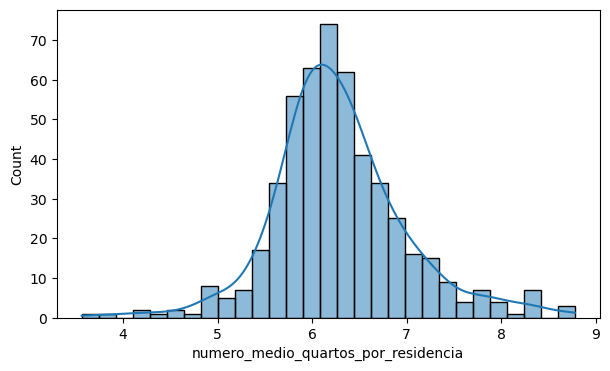

In [13]:
# Plot do histograma com o seaborn
# kde é o desenho da distribuição de densidade
plt.figure(figsize = (7, 4))
sns.histplot(data = dados, x = dados.numero_medio_quartos_por_residencia, kde = True)
plt.show()

Análise: 

- Aqui nenhum problema e a variável parece seguir uma distribuição normal, com a maioria dos valores ao redor da média.

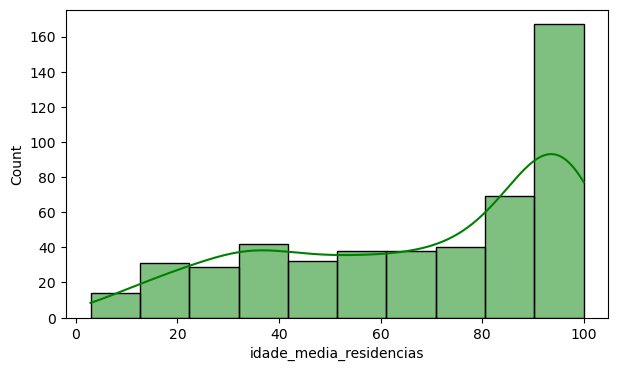

In [14]:
# Plot do histograma
plt.figure(figsize = (7, 4))
sns.histplot(data = dados, x = dados.idade_media_residencias, kde = True, color = 'green')
plt.show()

Análise: 

- A distribuição da variável **idade_media_residencias** sugere que a maioria das residências tem mais de 80 anos.

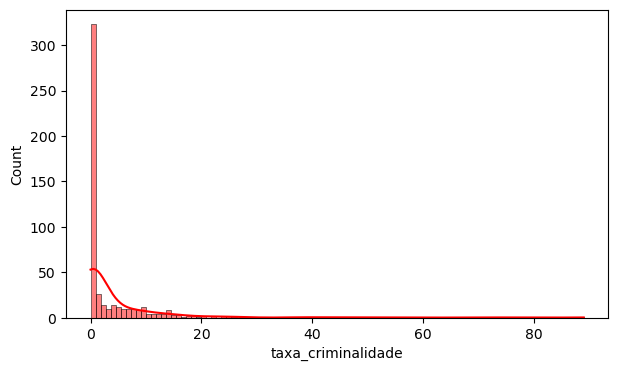

In [15]:
# Plot do histograma
plt.figure(figsize = (7, 4))
sns.histplot(data = dados, x = dados.taxa_criminalidade, kde = True, color = 'red')
plt.show()

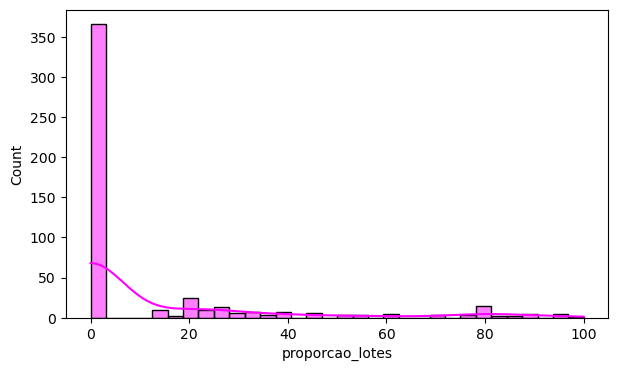

In [16]:
# Plot do histograma
plt.figure(figsize = (7, 4))
sns.histplot(data = dados, x = dados.proporcao_lotes, kde = True, color = 'magenta')
plt.show()

Análise: 

- As variáveis **taxa_criminalidade** e **proporcao_lotes** apresentam assimetria positiva. Isso sugere que a maioria das áreas tem taxas de criminalidade mais baixas, e a propporcao de lotes vazios é baixa na maioria dos bairros.  Mas temos um outlier nas 2 variaveis, tem que ver se é erro ou se procede

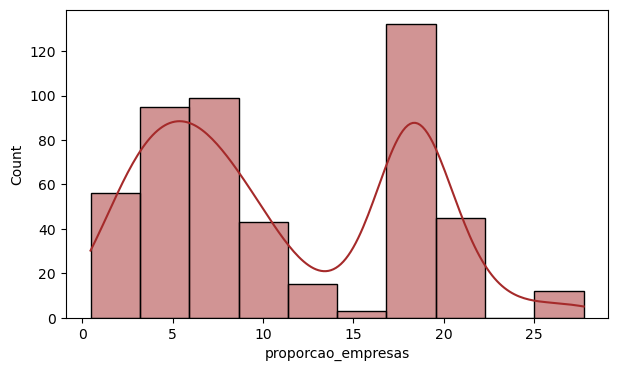

In [17]:
# Plot do histograma
plt.figure(figsize = (7, 4))
sns.histplot(data = dados, x = dados.proporcao_empresas, kde = True, color = 'brown')
plt.show()

Análise: 

- Não há como extrair um padrão claro. Isso é um forte indício que essa variável pode não ser relevante para prever a variável alvo.

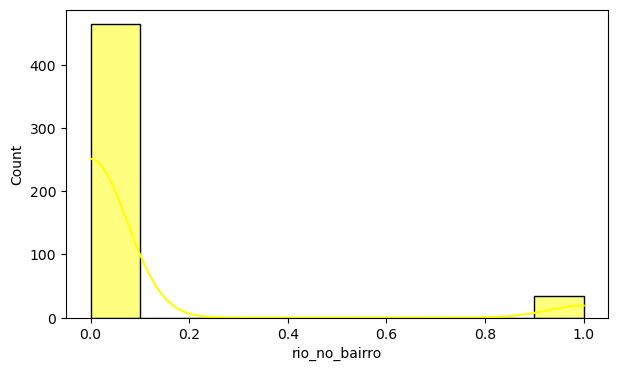

In [18]:
# Plot do histograma
plt.figure(figsize = (7, 4))
sns.histplot(data = dados, x = dados.rio_no_bairro, kde = True, color = 'yellow')
plt.show()

Análise: 

- A variável **rio_no_bairro**, com apenas 2 valores possíveis 0 e 1, segue uma distribuição binomial e a maioria das residências está longe de algum rio em cada bairro (rio_no_bairro = 0).

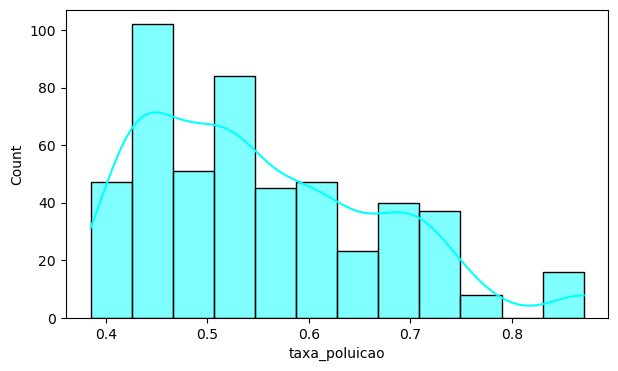

In [19]:
# Plot do histograma
plt.figure(figsize = (7, 4))
sns.histplot(data = dados, x = dados.taxa_poluicao, kde = True, color = 'cyan')
plt.show()

Análise: 

- A taxa de poluição é baixa para a maioria dos bairros.

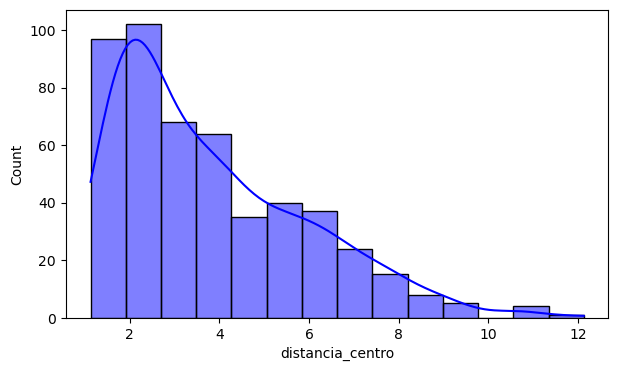

In [20]:
# Plot do histograma
plt.figure(figsize = (7, 4))
sns.histplot(data = dados, x = dados.distancia_centro, kde = True, color = 'blue')
plt.show()

Análise: 

- A distribuição da variável **distancia_centro** indica que a maioria das casas está bem próxima do centro da cidade (Downtown).

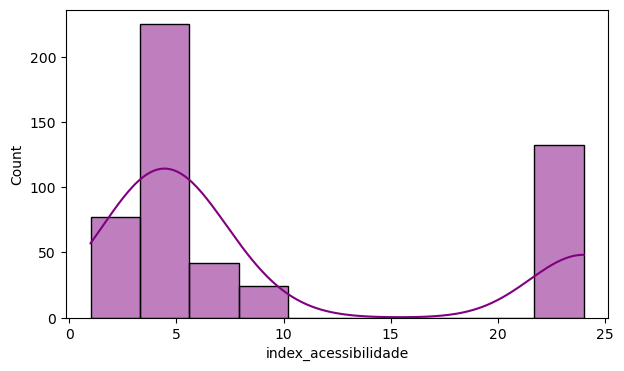

In [21]:
# Plot do histograma
# Proximidade dos bairros com as rodovias mais proximas - acessibilidade, qdo maior mais acessivel (20-25)
# Menos acessiveis tem uma barra grande no 5, pouco acessivel e imposto menor.
# Obs: qdo olhar para uma variavel e perceber um padrão fora do normal, busque outras variaveis com comportamento similar
# as variaveis pode se explicar
plt.figure(figsize = (7, 4))
sns.histplot(data = dados, x = dados.index_acessibilidade, kde = True, color = 'purple')
plt.show()

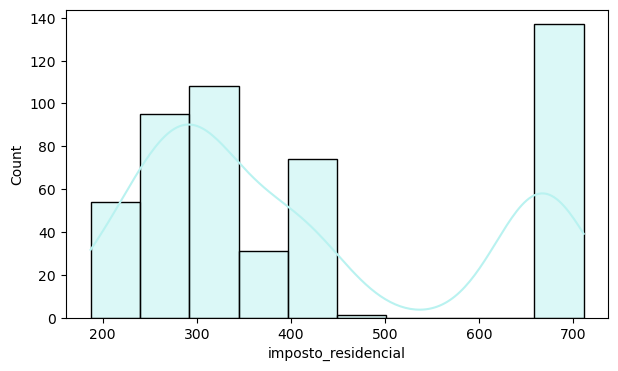

In [22]:
# Plot do histograma - cor cor tirada do htmlcolorcodes- link abaixo
# Qto mais acessivel, maior importa (barra 700)
plt.figure(figsize = (7, 4))
sns.histplot(data = dados, x = dados.imposto_residencial, kde = True, color = '#b9f2f0')
plt.show()

Para diferentes cores use valores hexadecimais: https://htmlcolorcodes.com

Análise: 

- A variável **index_acessibilidade** indica quão próximas (em média) as residências estão das rodovias. Quanto maior o índice, mais próximas estão.


- A variável **imposto_residencial** é a taxa paga ao governo.


- As variáveis **index_acessibilidade** e **imposto_residencial** apresentam distribuição bimodal, indicando que o imposto possivelmente é maior para alguns imóveis que possuem alto índice de acessibilidade às rodovias principais.


- Importante notar que as 2 variaveis **apresentam multicolinearidade**, tem alto grau de correlação em 2 variaveis de entrada.
- Essas 2 variáveis apresentam mesmo teor de informação, fazendo o modelo reforçar essa informação tornando o modelo tendencioso.

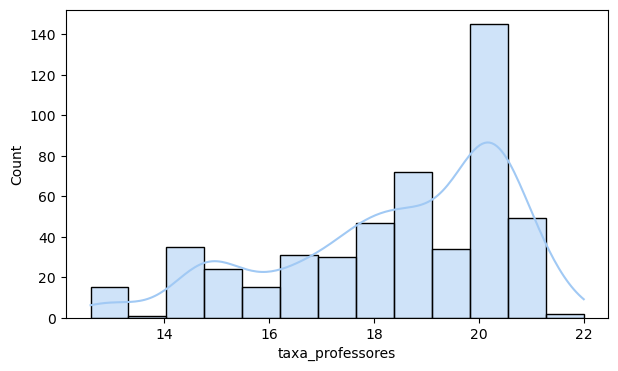

In [23]:
# Plot do histograma
plt.figure(figsize = (7, 4))
sns.histplot(data = dados, x = dados.taxa_professores, kde = True, color = '#a1c9f4')
plt.show()

Análise: 

- A maioria dos bairros tem alta taxa de professores.

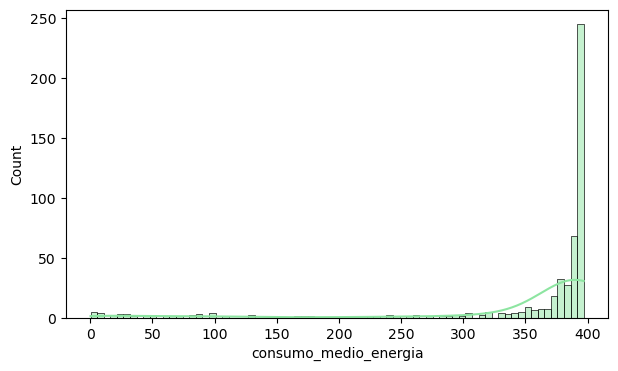

In [24]:
# Plot do histograma
plt.figure(figsize = (7, 4))
sns.histplot(data = dados, x = dados.consumo_medio_energia, kde = True, color = '#8de5a1')
plt.show()

Análise: 

- O consumo médio de energia é muito similar em quase todos os bairros.

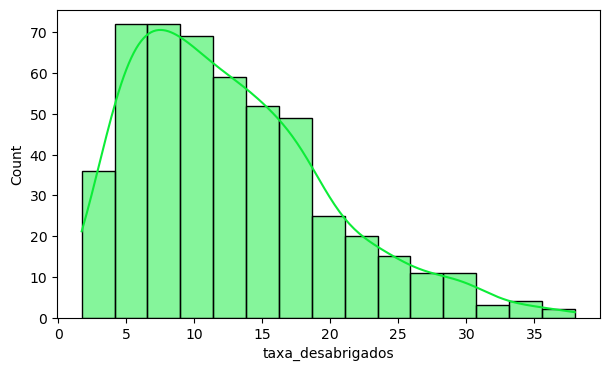

In [25]:
# Plot do histograma
plt.figure(figsize = (7, 4))
sns.histplot(data = dados, x = dados.taxa_desabrigados, kde = True, color = '#0DEC38')
plt.show()

Análise: 

- A taxa de desabrigados é baixa na maioria dos bairros.

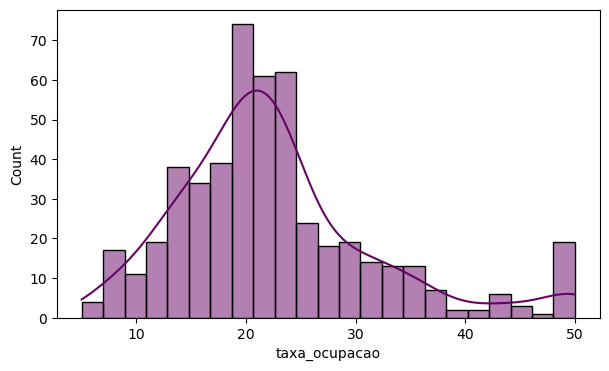

In [26]:
# Plot do histograma
plt.figure(figsize = (7, 4))
sns.histplot(data = dados, x = dados.taxa_ocupacao, kde = True, color = '#660465')
plt.show()

Análise: 

#### A variável dependente (variavel alvo) parece estar ligeiramente assimétrica à direita.(skewness)
- Valores  negativos  para  a  assimetria  indicam  dados  distorcidos  à  esquerda  e  valores positivos para a assimetria indicam dados distorcidos à direita
-  Se  os  dados  forem  multimodais  (tiverem  duas  modas  oudois  valores  que aparecem com mais frequência), pode afetar o sinal da assimetria
- Para  uma  distribuição  unimodal  (uma  única  moda),  a  inclinação  negativa  geralmente indica  que  a  cauda  está  no  lado  esquerdo  da  distribuição  e  a  inclinação  positiva  indica  que  a cauda está à direita
- Um valor de assimetria maior que 1 ou menor que -1 indica uma distribuição altamente distorcida. Um valor entre -0,5 e -1 ou 0,5 e 1 é moderadamente distorcido. Um valor entre -0,5 e 0,5 indica que a distribuição é bastantesimétrica

##### Portanto a variavel taxa_ocupação não parece seguir uma distribuição Normal oq é um problema pra usá-la na Regressão Linear
- Observa-se tb que a maioria dos registros estão ao redor da média (22), mas temos tb mtas observações proximas ao 50
- o que explica essa taxa de ocupação tão mais alta que a média? Leva essa variavel assim para analise?

A normalidade, uma suposição da Regressão Linear, parece direta, mas na verdade NÃO significa que a variável é normalmente distribuída. Na verdade, uma regressão linear pode ser bem-sucedida  com  distribuições  não  normais  dasvariáveis.  **Em  vez disso,  a  suposição  de normalidade  significa  que  os resíduos  resultantes  do  modelo  de  Regressão  Linear  devem  ser normalmente distribuídos.**

Para alcançar bons resultados na validação das suposições, dados simétricos são mais fáceis de trabalhar porque o centro de simetria serve como uma caracterização conveniente da localização de uma distribuição.

A  transformação  de  log(logaritmo) permite  eliminar  a  assimetria  dos  dados  ou  pelo menos  suavizá-la  e  variáveis  com  transformação  de  log  são  mais  propensas  a  atender  às suposições  da  Regressão  Linear,  particularmente  linearidade,  homocedasticidade  e  resíduo normalmente distribuído. 

Verificar a assimetria da variável avo e aplicar a transformação de log, portanto, pode ajudar nosso trabalho de construir um modelo mais preciso.

Para  que  a  estimativa  da  inclinação  da  regressão  seja  imparcial,  a  associação  entre  as variáveis  dependentes  e  independentes  precisa  ser  linear.  A  variável  distorcida (assimétrica) geralmente tem outliers extremos que podem distorcer a relação linear.

Observe abaixo a diferença do cálculo dos resíduos de um modelo de Regressão Linear (que criaremos daqui a pouco). Do lado esquerda a variável original assimétrica e do lado direito a  variável  foi  transformada.  Queremos  o  resultado  do  lado  direito  para  atender  uma  das suposições da Regressão Linear


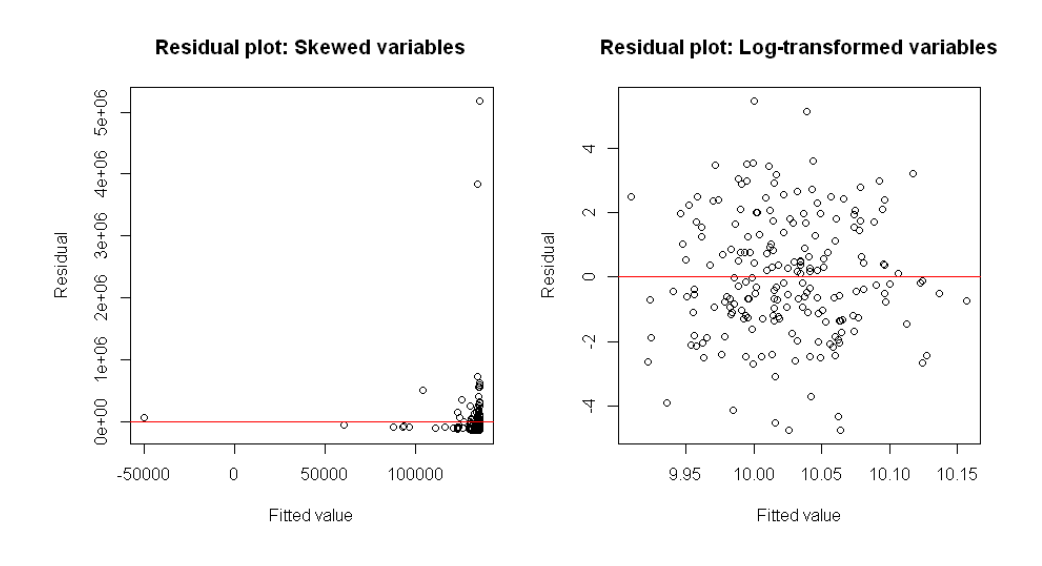

Como a variável dependente está levemente distorcida, aplicaremos uma transformação logarítmica na coluna **taxa_ocupacao** e verificaremos a distribuição da coluna transformada. Por quê? Para evitar distorção nos dados, algo causado por valores discrepantes. O objetivo com essa transormação é analisar e compreender o padrão nos dados.

Vamos verificar a assimetria (skewness) de todas as variáveis.

In [27]:
# Verificando skewness - função do Pandas, que na pratica é um metodo no nosso df dados
dados.skew(axis = 0) # axis(eixo) de coluna, zero

numero_medio_quartos_por_residencia    0.408139
idade_media_residencias               -0.584415
taxa_criminalidade                     5.194110
proporcao_lotes                        2.205864
proporcao_empresas                     0.295577
rio_no_bairro                          3.380756
taxa_poluicao                          0.731641
distancia_centro                       0.993597
index_acessibilidade                   0.991658
imposto_residencial                    0.652944
taxa_professores                      -0.793662
consumo_medio_energia                 -2.868339
taxa_desabrigados                      0.893201
taxa_ocupacao                          1.099558
dtype: float64

Um valor de assimetria maior que 1 ou menor que -1 indica uma distribuição altamente distorcida. Um valor entre 0,5 e 1 ou -0,5 e -1 é moderadamente distorcido. Um valor entre -0,5 e 0,5 indica que a distribuição é bastante simétrica.

Taxa de ocupação = 1,09 assimetria positiva, a direita, como mostra o grafico!

As outras variaveis de entrada tb precisam ser tratadas, mas vamos fazer no decorrer do projeto conforme necessidade

In [28]:
# Transformação de log 
# Cria outra variavel, taxa_ocupacao_log, pra não substituir a variavel original (nossa variavel alvo)
dados['taxa_ocupacao_log'] = np.log(dados['taxa_ocupacao'])

<AxesSubplot:xlabel='taxa_ocupacao_log', ylabel='Count'>

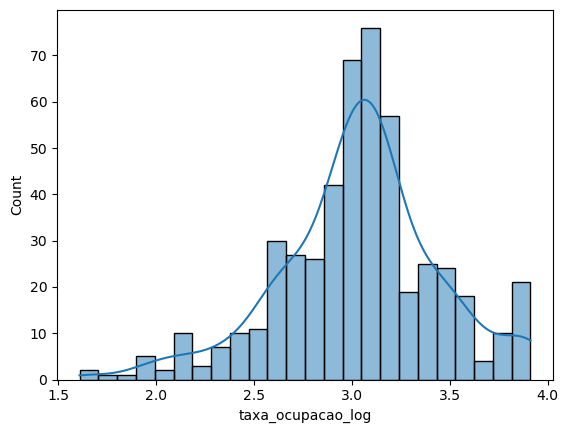

In [29]:
sns.histplot(data = dados, x = 'taxa_ocupacao_log', kde = True)

Gráfico praticamente simetrico, depois do tratamento.
Obs: Qdo usamos log, mudamos a escala da variavel. (dados.head e figura abaixo)
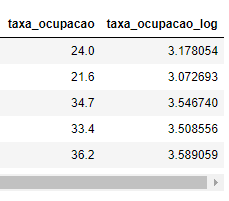

In [30]:
dados.skew(axis = 0)

numero_medio_quartos_por_residencia    0.408139
idade_media_residencias               -0.584415
taxa_criminalidade                     5.194110
proporcao_lotes                        2.205864
proporcao_empresas                     0.295577
rio_no_bairro                          3.380756
taxa_poluicao                          0.731641
distancia_centro                       0.993597
index_acessibilidade                   0.991658
imposto_residencial                    0.652944
taxa_professores                      -0.793662
consumo_medio_energia                 -2.868339
taxa_desabrigados                      0.893201
taxa_ocupacao                          1.099558
taxa_ocupacao_log                     -0.332872
dtype: float64

In [31]:
dados.head()

,numero_medio_quartos_por_residencia,idade_media_residencias,taxa_criminalidade,proporcao_lotes,proporcao_empresas,rio_no_bairro,taxa_poluicao,distancia_centro,index_acessibilidade,imposto_residencial,taxa_professores,consumo_medio_energia,taxa_desabrigados,taxa_ocupacao,taxa_ocupacao_log
0,6.575,65.2,0.00632,18.0,2.31,0,0.538,4.0900,1,296,15.3,396.90,4.98,24.0,3.178054
1,6.421,78.9,0.02731,0.0,7.07,0,0.469,4.9671,2,242,17.8,396.90,9.14,21.6,3.072693
2,7.185,61.1,0.02729,0.0,7.07,0,0.469,4.9671,2,242,17.8,392.83,4.03,34.7,3.546740
3,6.998,45.8,0.03237,0.0,2.18,0,0.458,6.0622,3,222,18.7,394.63,2.94,33.4,3.508556
4,7.147,54.2,0.06905,0.0,2.18,0,0.458,6.0622,3,222,18.7,396.90,5.33,36.2,3.589059


Análise:

- A distorção foi reduzida. Agora a variável dependente apresenta estar moderadamente distorcida.


- A variável log-transformada (**taxa_ocupacao_log**) parece ter uma distribuição quase normal sem distorção e, portanto, podemos prosseguir.

Antes de criar o modelo de regressão linear, é importante verificar a relação bivariada entre as variáveis. Vamos verificar o mesmo usando o mapa de calor e o gráfico de dispersão.

<font color= darkred > <b> Analise Bivariada </b> </font>

Vamos verificar a correlação usando um mapa de calor. A correlação é um coeficiente da relação das variáveis que pode assumir valores de -1 a +1, sendo:

- O valor de -1 indica forte correlação negativa.
- O valor de +1 indica forte correlação positiva.
- O valor de zero indica que não há correlação.

**Notas:**

- Queremos uma alta correlação das variáveis preditoras com a variável alvo e uma baixa correlação entre as variáveis preditoras para ter um modelos equilibrado, generalizavel. 
- Alta correlação entre as variáveis preditoras (positiva ou negativa) indica **problema de multicolinearidade e tem que ser resolvido.**

In [32]:
# Matriz de correlação - Com 1 linha de codigo :)))
dados.corr()

,numero_medio_quartos_por_residencia,idade_media_residencias,taxa_criminalidade,proporcao_lotes,proporcao_empresas,rio_no_bairro,taxa_poluicao,distancia_centro,index_acessibilidade,imposto_residencial,taxa_professores,consumo_medio_energia,taxa_desabrigados,taxa_ocupacao,taxa_ocupacao_log
numero_medio_quartos_por_residencia,1.000000,-0.243044,-0.218919,0.314221,-0.393012,0.092122,-0.303151,0.208031,-0.208559,-0.291159,-0.362163,0.127517,-0.613654,0.696424,0.632340
idade_media_residencias,-0.243044,1.000000,0.355852,-0.568654,0.645526,0.088155,0.731859,-0.747426,0.463883,0.512673,0.258119,-0.276578,0.608452,-0.376758,-0.454326
taxa_criminalidade,-0.218919,0.355852,1.000000,-0.203363,0.407351,-0.057316,0.422339,-0.384391,0.624880,0.581835,0.297472,-0.383776,0.454628,-0.390960,-0.530713
proporcao_lotes,0.314221,-0.568654,-0.203363,1.000000,-0.534292,-0.044375,-0.516414,0.663235,-0.319191,-0.320072,-0.388901,0.178462,-0.417814,0.359733,0.363476
proporcao_empresas,-0.393012,0.645526,0.407351,-0.534292,1.000000,0.063174,0.763810,-0.709502,0.599156,0.724065,0.384794,-0.357710,0.606354,-0.484606,-0.542907
rio_no_bairro,0.092122,0.088155,-0.057316,-0.044375,0.063174,1.000000,0.091835,-0.101685,-0.010326,-0.037972,-0.119013,0.050259,-0.055847,0.174606,0.158163
taxa_poluicao,-0.303151,0.731859,0.422339,-0.516414,0.763810,0.091835,1.000000,-0.770068,0.616414,0.671652,0.188255,-0.381440,0.593524,-0.427432,-0.511366
distancia_centro,0.208031,-0.747426,-0.384391,0.663235,-0.709502,-0.101685,-0.770068,1.000000,-0.505664,-0.543241,-0.226258,0.296059,-0.504135,0.248688,0.343079
index_acessibilidade,-0.208559,0.463883,0.624880,-0.319191,0.599156,-0.010326,0.616414,-0.505664,1.000000,0.909742,0.482377,-0.442594,0.485830,-0.387305,-0.487378
imposto_residencial,-0.291159,0.512673,0.581835,-0.320072,0.724065,-0.037972,0.671652,-0.543241,0.909742,1.000000,0.475243,-0.440226,0.541711,-0.473117,-0.565867


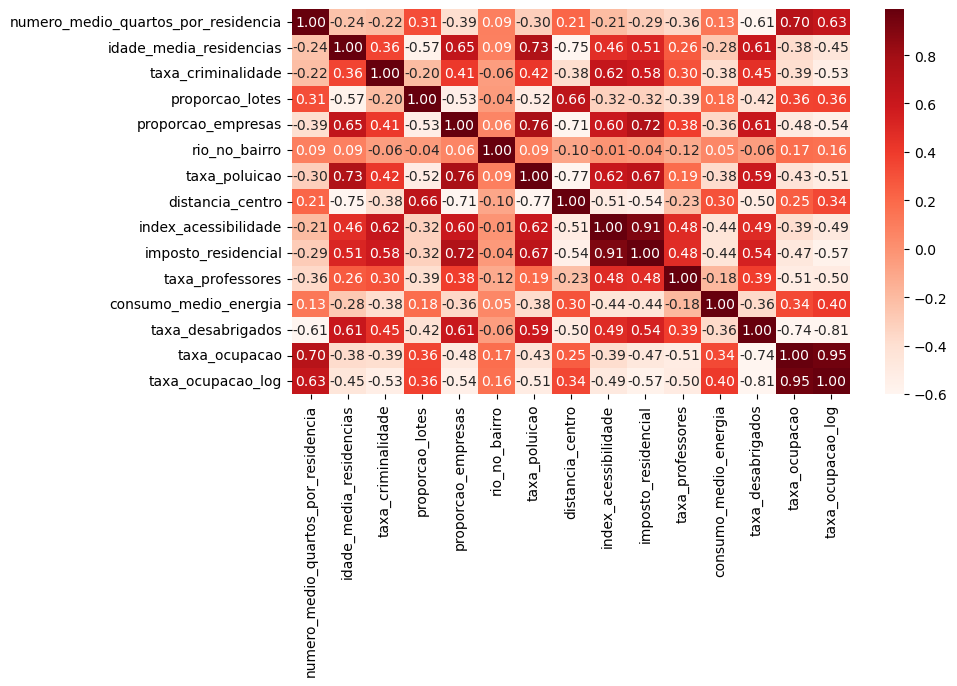

In [33]:
# Tamanho da figura
plt.figure(figsize = (9,5))

# Mapa de calor
# Estamos realçando os valores de correlação entre 0.59 e 0.99, positivo ou negativo.
# annotation = True é o numero dentro de cada celula. Otimo pra visualização!
# colormap cmap com valor minimo de 0,60 e maximo 0,99 para as tonalidades de preenchimento - marca de corte
sns.heatmap(dados.corr(), annot = True, fmt = '.2f', cmap = 'Reds', vmax = .99, vmin = -0.60)
plt.show()

Análise:

- Vemos uma correlação significativa entre as variáveis **taxa_poluicao** e **proporcao_empresas**.


- A variável **taxa_poluicao** também apresenta um alto valor de correlação positiva com a **idade_media_residencias**, bem como um valor significativamente correlacionado negativamente com a **distancia_centro** e **idade_media_residencias**(qto maior a distancia do centro, menor poluição, qdo maior idade media da residencia, menor distancia do centro)


- A variável **proporcao_empresas** tem um alto valor de correlação com **imposto_residencial**.


- A **taxa_ocupacao** tem um alto valor de correlação com **numero_medio_quartos_por_residencia**, e também significativamente correlacionado negativamente com **taxa_desabrigados**.


- **taxa_ocupacao e taxa_ocupacao_log** são as mesmas variaveis de fato, apenas estão em escalas diferentes por isso a correlaçao tão alta.

- Analise todas as correlações entre 0.59 e 0.99.

#### Vamos analisar mais de perto as variáveis com maior correlação.

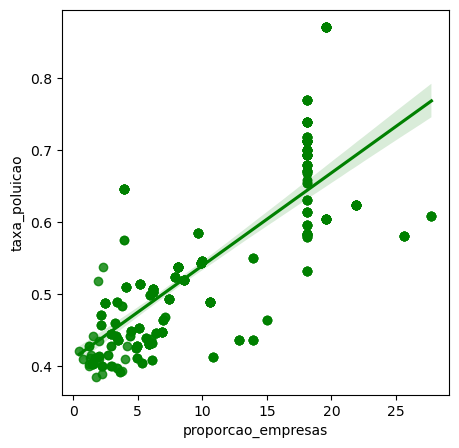

In [34]:
# Scatter Plot 1 - regplot é m plot de regressão, cria uma regressao linear simples
plt.figure(figsize = (5, 5))
sns.regplot(x = 'proporcao_empresas', y = 'taxa_poluicao', data = dados, color = 'green') 
plt.show()

In [35]:
# Coeficiente de Correlação - usou coeficiente de pearson
# Que traz outras informações, mas so queremos o so a informação de indice 0, 1ª informação Ver!
print('A Correlação entre as variáveis é:', pearsonr(dados['proporcao_empresas'], 
                                                     dados['taxa_poluicao'])[0])

A Correlação entre as variáveis é: 0.7638104350783939


Análise:

- **Correlação Positiva**: A taxa de poluição aumenta em bairros com maior proporção de empresas.

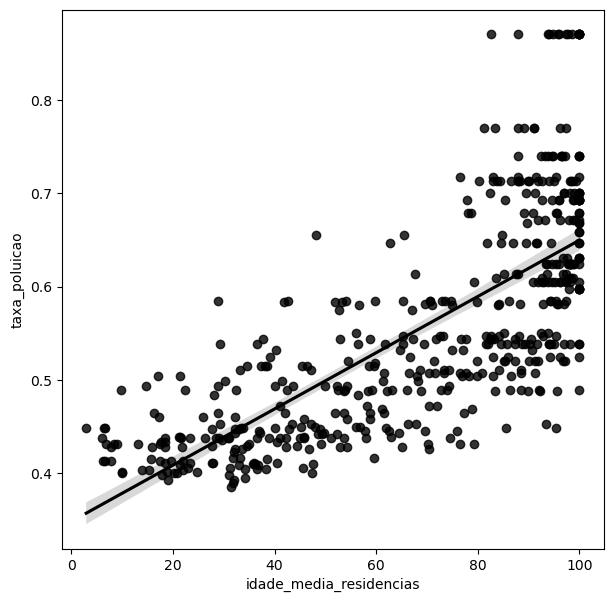

In [36]:
# Scatter Plot 2
plt.figure(figsize = (7, 7))
sns.regplot(x = 'idade_media_residencias', y = 'taxa_poluicao', data = dados, color = 'black') 
plt.show()

In [37]:
# Coeficiente de Correlação
print('A Correlação entre as variáveis é:', pearsonr(dados['idade_media_residencias'], 
                                                     dados['taxa_poluicao'])[0])

A Correlação entre as variáveis é: 0.7318586310142243


Análise:

- **Correlação Positiva**: A taxa de poluição aumenta em bairros com residências de maior idade (construídas há mais tempo).

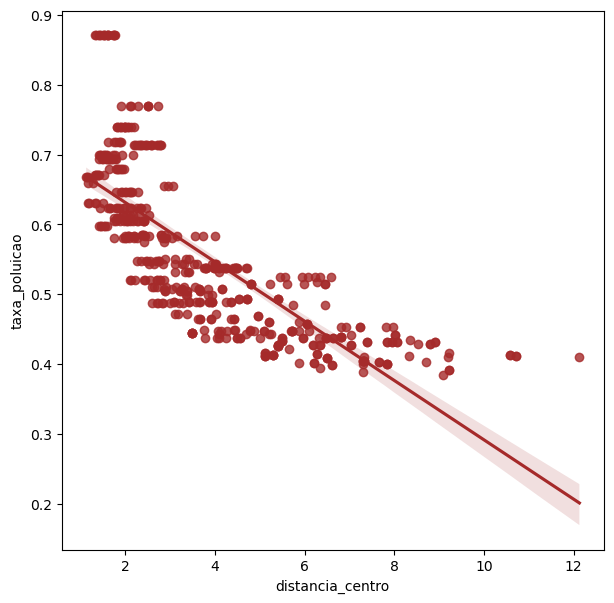

In [38]:
# Scatter Plot 3 - Correlação negativa, reta negativamente inclinada! 
plt.figure(figsize = (7, 7))
sns.regplot(x = 'distancia_centro', y = 'taxa_poluicao', data = dados, color = 'brown') 
plt.show()

In [39]:
# Coeficiente de Correlação
print('A Correlação entre as variáveis é:', pearsonr(dados['distancia_centro'], 
                                                     dados['taxa_poluicao'])[0])

A Correlação entre as variáveis é: -0.7700682232177495


Análise:

- **Correlação Negativa**: A taxa de poluição diminui em bairros à medida que aumenta a distância para o centro da cidade.

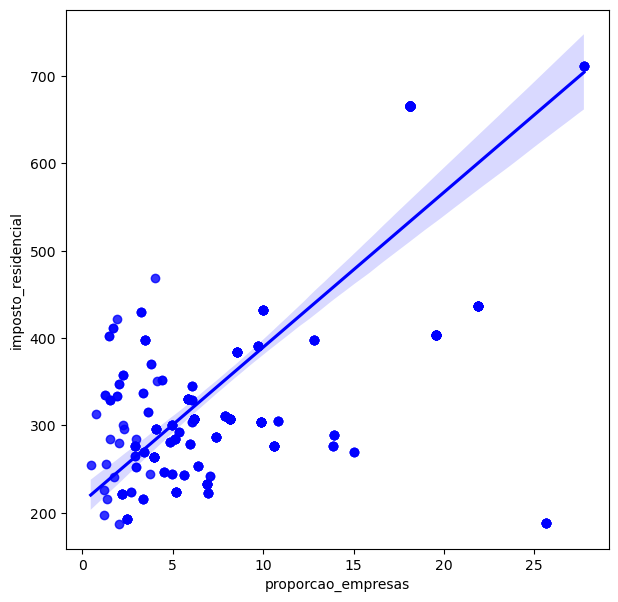

In [40]:
# Scatter Plot 4
plt.figure(figsize = (7, 7))
sns.regplot(x = 'proporcao_empresas', y = 'imposto_residencial', data = dados, color = 'blue') 
plt.show()

In [41]:
# Coeficiente de Correlação
print('A Correlação entre as variáveis é:', pearsonr(dados['proporcao_empresas'], 
                                                     dados['imposto_residencial'])[0])

A Correlação entre as variáveis é: 0.7240653150756318


Análise:

- **Correlação Positiva**: O imposto aumenta com um aumento na proporção de empresas por bairro. Isso pode ser devido ao fato das variáveis estarem relacionadas com uma terceira variável. Não vemos uma relação direta, pode ser por um 3º fator

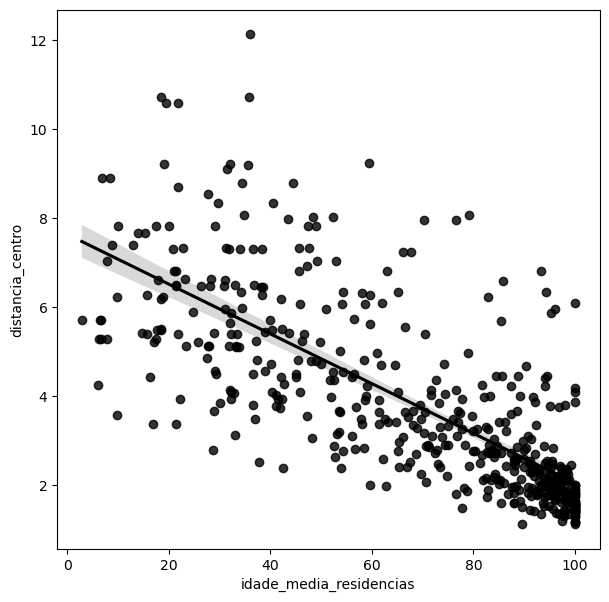

In [42]:
# Scatter Plot 5
plt.figure(figsize = (7, 7))
sns.regplot(x = 'idade_media_residencias', y = 'distancia_centro', data = dados, color = 'black')
plt.show()

In [43]:
# Coeficiente de Correlação
print('A Correlação entre as variáveis é:', pearsonr(dados['idade_media_residencias'], 
                                                     dados['distancia_centro'])[0])

A Correlação entre as variáveis é: -0.7474258681640552


Análise:

- **Correlação Negativa**: À medida que aumenta a distância do cento, diminui a idade média das residências.

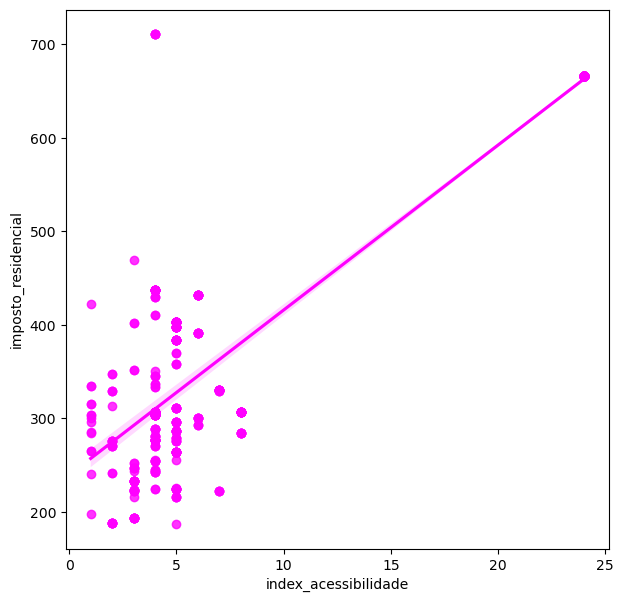

In [44]:
# Scatter Plot 6
plt.figure(figsize = (7, 7))
sns.regplot(x = 'index_acessibilidade', y = 'imposto_residencial', data = dados, color = 'magenta')
plt.show()

In [45]:
# Coeficiente de Correlação
print('A Correlação entre as variáveis é:', pearsonr(dados['index_acessibilidade'], 
                                                     dados['imposto_residencial'])[0])

A Correlação entre as variáveis é: 0.9097418944674462


Análise:

- **Correlação Positiva**: A correlação entre as variáveis é muito alta, mas nenhuma tendência é visível entre as duas variáveis. Isso pode ser devido a outliers. Mas não há um padrao claro entre indice de acessibilidade e imposto, pode ter sido causado por alguma outra força.

Vamos realizar um trabalho de tratamento de outliers nas variáveis do gráfico anterior. E então vamos verificar a correlação depois de remover os valores discrepantes. Quando plotamos o histograma na análise univariada observamos que a maioria dos valores está abaixo de 600. Vamos criar o plot novamente.

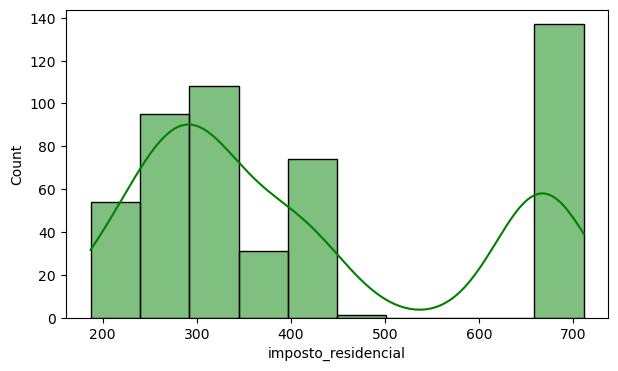

In [46]:
# Plot do histograma
plt.figure(figsize = (7, 4))
sns.histplot(data = dados, x = dados.imposto_residencial, kde = True, color = 'green')
plt.show()

In [47]:
# Removendo outliers (mantemos apenas o que for menor que 600)
# Salvando em df1 para não alterar o df original, estamos pesquisando ainda
df1 = dados[dados['imposto_residencial'] < 600]

In [48]:
# Coeficiente de Correlação (observe que não alteramos o dataset original e por isso estamos usando df1)
# Diminuição significativa do coeficiente de correlação, 
# pois tiramos o fator (outliers) que estava influenciando o calculo matematico
print('A Correlação entre as variáveis é:', pearsonr(df1['imposto_residencial'], 
                                                     df1['index_acessibilidade'])[0])

A Correlação entre as variáveis é: 0.23887638770857889


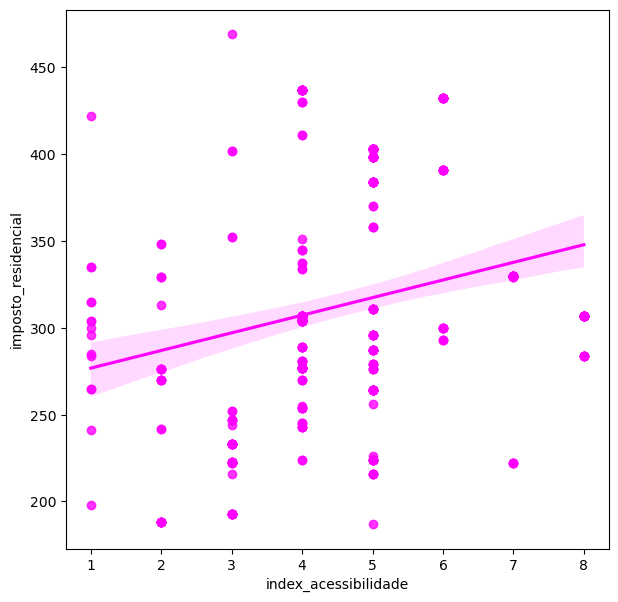

In [49]:
# Scatter Plot 6
plt.figure(figsize = (7, 7))
sns.regplot(x = 'index_acessibilidade', y = 'imposto_residencial', data = df1, color = 'magenta')
plt.show()

In [50]:
# Coeficiente de Correlação
print('A Correlação entre as variáveis é:', pearsonr(df1['imposto_residencial'], 
                                                     df1['index_acessibilidade'])[0])

A Correlação entre as variáveis é: 0.23887638770857889


Análise:

- **Correlação Positiva**.

- A correlação entre as duas variáveis era de 0.91 antes de remover os outliers. Caiu para 0.24 após a remoção.

- Portanto, a alta correlação entre as variáveis se deve aos outliers. O valor do imposto para algumas propriedades pode ser maior devido a algum outro motivo. 
- Não parece haver relação entre as duas variáveis diretamente.

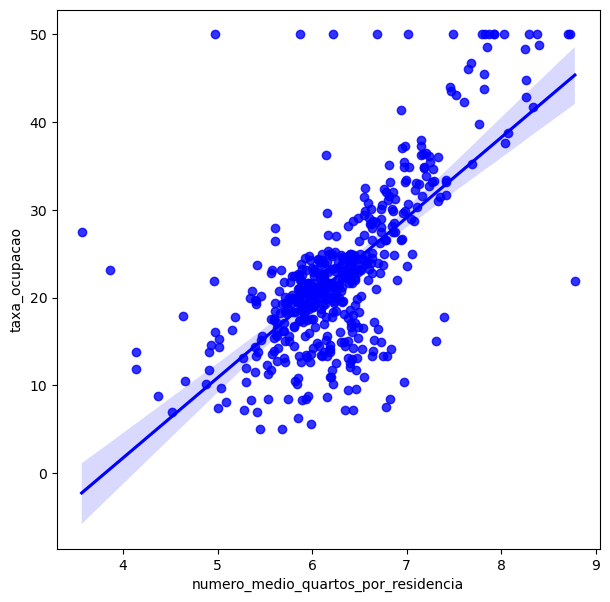

In [51]:
# Scatter Plot 7
plt.figure(figsize = (7, 7))
sns.regplot(x = 'numero_medio_quartos_por_residencia', y = 'taxa_ocupacao', data = dados, color = 'blue')
plt.show()

In [52]:
# Coeficiente de Correlação
print('A Correlação entre as variábeis é:', pearsonr(dados['numero_medio_quartos_por_residencia'], 
                                                     dados['taxa_ocupacao'])[0])

A Correlação entre as variábeis é: 0.6964238264843786


Análise:

- **Correlação Positiva**.

- A taxa de ocupação das casas parece aumentar à medida que aumenta o número médio de quartos na residência. Isso é esperado, pois a taxa de ocupação pode ser mais alta se houver mais quartos.

- Existem alguns valores discrepantes em uma linha horizontal no topo do gráfico. Parece indicar um limite nos dados qdo foram coletados.

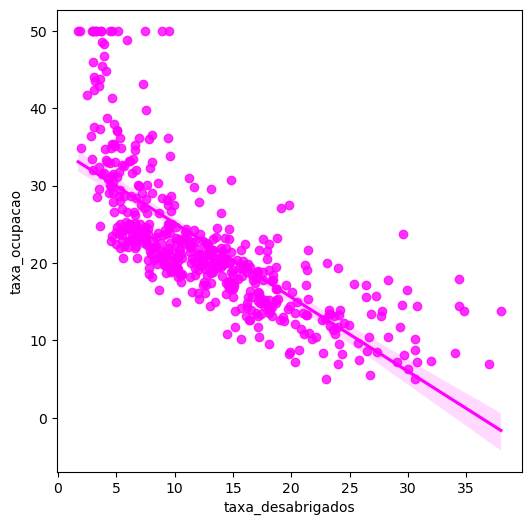

In [53]:
# Scatter Plot 8
plt.figure(figsize = (6, 6))
sns.regplot(x = 'taxa_desabrigados', y = 'taxa_ocupacao', data = dados, color = 'magenta')
plt.show()

In [54]:
# Coeficiente de Correlação
print('A Correlação entre as variábeis é:', pearsonr(dados['taxa_desabrigados'], 
                                                     dados['taxa_ocupacao'])[0])

A Correlação entre as variábeis é: -0.7422362776461562


Análise:

- **Correlação Negativa**. 

- Bairros com maior número de desabrigados (moradores de rua) apresentam uma taxa menor de ocupação das residências.

- Existem poucos outliers e os dados parecem estar limitados a 50.

#### Conclusão da Análise Exploratória

##### Existem relações significativas entre algumas variáveis independentes, o que não é desejável para um modelo de regressão linear e decisões terão que ser tomadas. E tomaremos as decisões com base em análise dos dados. 

<font color= darkred > <b> Preparação dos Dados </b> </font>

Obs: Vamos dividir o conjunto de dados em variáveis X e Y e então dividir os dados em treino e teste com proporção 80/20.

In [55]:
# Separando as variáveis
Y = dados['taxa_ocupacao_log'] # variavel alvo logoritimizada
X = dados.drop(columns = {'taxa_ocupacao', 'taxa_ocupacao_log'}) #remove a original em escala diferente

In [56]:
# Divide os dados produzindo amostras para treino e teste.
X_treino, X_teste, y_treino, y_teste = train_test_split(X, Y, test_size = 0.20 , random_state = 1)

In [57]:
# 400 amostras-Linhas em 13 variaveis-colunas
X_treino.shape

(400, 13)

In [58]:
X_teste.shape

(100, 13)

In [59]:
#unica variavel 100 linhas
y_treino.shape

(400,)

In [60]:
y_teste.shape

(100,)

<font color= darkred > <b>Modelagem Estatistica - Estudando os relacionamentos entre variaveis. </b> </font> 

<font color= darkgreen > <b>  1ª Versão do Modelo - Com dados brutos </b> </font>

Aqui usaremos os dados de entrada no seu estado bruto original. 
É exigencia dos modelos de RL que os dados estejam padronizados, mas vamos começar essa versão com formato bruto para comparar resultados da padronização


In [61]:
# Precisa formatar os dados para o framework que estamos usando, que é o stats models (sm)
# Adiciona a constante (intercepto)
# Isso é requerido pelo Statsmodels
X_treino_const = sm.add_constant(X_treino)

In [62]:
X_treino_const.shape

(400, 14)

In [63]:
type(X_treino_const)

pandas.core.frame.DataFrame

In [64]:
# Cria o modelo - no stats models usa o metodo OLS, precisa adicionar uma cte para os dados de entrada
# a constante é o intercepto
# obs - no sklearn não precisa cte, mas pra modelagem estatistica não é tão bom, otimo para modelagem preditiva ML
modelo_v1 = sm.OLS(y_treino, X_treino_const).fit()

 <font color= darkred > <b>  Explicação dos Coeficientes produzidos pela tabela de Regressão OLS </b> </font>

Os  coeficientes  do  modelo  são  mostrados  na  coluna  "coef"  da  tabela  resumo.  Esses coeficientes representam a mudança na variável dependente (y) para cada mudança de unidade na variável independente, mantendo todas as outras variáveis constantes.

Os erros padrão dos coeficientes são mostrados na coluna "std err" e podem ser usados paracalcular intervalos de confiança para os coeficientes.

Os valores-t e os valores-p nas colunas "t" e "P>|t|", respectivamente, podem ser usadospara testar a significância estatística dos coeficientes. Variáveis com valor-p abaixo de 0.05 não são estatisticamente significantes para prever a variável alvo e podem ser removidas do conjunto de dados.

O valor de R ao quadrado na linha "R-squared" da tabela de resumo indica a proporção da variância na variável dependente (variável alvo) que é explicada pelo modelo. Quanto maior o R2, melhor. O R2é chamado de coeficiente de determinação.

<font color= darkgreen > <b> O Akaike Information Criterion (AIC) - É uma medida da qualidade do ajuste do modelo</b> </font>

É definido como: **AIC = 2 * (número de parâmetros) -2 * (log-verossimilhança máxima)**

O AIC é uma medida da qualidade relativa de um modelo estatístico, com um AIC mais baixo indicando um melhor ajuste. O AIC leva em consideração a complexidade do modelo e a quantidade de dados usados para ajustá-lo e, portanto, fornece um equilíbrio entre o ajuste do modelo e sua simplicidade.

Na tabela de resumo, o AIC é mostrado na linha "AIC". Ao comparar diferentes modelos, você pode usar o AIC para selecionar o modelo que oferece o melhor equilíbrio entre ajuste e simplicidade. No entanto, é importante observar que o AIC deve ser usado como uma medida relativa,  em  vez  de  uma  medida  absoluta,  e  deve  ser  interpretado  no  contexto  dos  dados específicos e da questão de pesquisa que está sendo analisada.

<font color= darkgreen > <b> O Bayesian Information Criterion (BIC) é uma medida da qualidade do ajuste do modelo</b> </font>

É definido como: **BIC = log(n) * (número de parâmetros) -2 * (log-verossimilhança máxima)**

onde n é o número de pontos de dados usados para ajustar o modelo.

Como o Akaike Information Criterion (AIC), o BIC é uma medida da qualidade relativa de um modelo estatístico, com um BIC mais baixo indicandoum melhor ajuste. O BIC leva em consideração  a  complexidade  do  modelo  e  a  quantidade  de  dados  usados  para  ajustá-lo  e, portanto, fornece um equilíbrio entre o ajuste do modelo e sua simplicidade.

Na tabela de resumo, o BIC é mostrado na linha "BIC". Ao comparar modelos diferentes, você pode usar o BIC para selecionar o modelo que oferece o melhor equilíbrio entre ajuste e simplicidade. No entanto, é importante observar que o BIC deve ser usado como uma medida relativa,  em  vez  de  uma  medida  absoluta,  e  deve  ser  interpretado  no  contexto  dos  dados específicos e da questão de pesquisa que está sendo analisada.

<font color= darkgreen > <b> A Estatística F é uma medida da significância geral do modelo</b> </font>

É calculado como a razão entre a variação média quadrática explicada e o erro quadrático médio:

**Estatística F= (variação média quadrática explicada) / (erro médio quadrático)**

A variação média quadrática explicada é a variância da variável dependente (y) explicada pelo modelo,e o erro médio quadrático é a variância dos resíduos (erros) do modelo.

A Estatística F é usada para testar a hipótese nula de que todos os coeficientes do modelo são iguais a zero (ou seja, que nenhuma das variáveis independentes está relacionada à variável dependente). 

Um **grande valor da Estatística F** indica que o modelo é **significativamente melhor do  que  o  modelo  nulo**  (ou  seja,  que  pelo  menos  uma  das  variáveis independentes  está relacionada à variável dependente), enquanto **um valor baixo da Estatística F** indica que o modelo **não é significativamente melhor do que o modelo nulo.**

Na tabela de resumo, a Estatística F é mostrada na linha "F-statistic", juntamente com o valor-p correspondente na linha "Prob (F-statistic)". O valor-p é usado para testar a significância estatística da Estatística F. 

**Se o valor-p for menor que o nível de significância (geralmente 0,05), a hipótese nula pode ser rejeitada e o modelo é considerado significativamente melhor do que um modelo nulo.**

<font color= darkgreen > <b> Interpretação dos GL dos resíduos</b> </font>

O valor  "Df  Residuals"  representa  os  graus  de  liberdade  dos  resíduos.  

Os  graus  de liberdade de um modelo estatístico é o número de observações independentes no modelo, que é  igual  ao  número  de  pontos  de  dados  menos  o  número  de  parâmetros  que  estão  sendo estimados.

Para um modelo de RL, os GL dos resíduos são iguais ao número de pontos de dados menos o número de coeficientes sendo estimados (incluindo a interceptação). 

Os graus de liberdade dos resíduos podem ser usados para calcular a variância dos resíduos e os erros padrão dos coeficientes.

Na tabela de resumo, o valor de graus de liberdade dos resíduosé mostrado na linha"Df Residuals". É importante verificar o valor "Df Residuals" para garantir que haja graus de liberdade suficientes para estimar o modelo com precisão. 

Se o valor "Df Residuals" for muito pequeno, pode indicar que o modelo está superajustando os dados ou que não há dados suficientes para estimar o modelo com precisão.

<font color= darkgreen > <b> Interpretação do tipo de Covariância</b> </font>

O valor "Tipo de covariância" indica o método usado para estimar a matriz de covariância dos parâmetros do modelo. 

A matriz de covariância é uma matriz das variâncias e covariâncias dos parâmetros do modelo e é usada para calcular os erros padrão e os intervalos de confiança dos parâmetros.

Existem  vários  métodos  diferentes  que  podem  ser  usados  para  estimar  a  matriz  de covariância, incluindo o método "não robusto", o método "HC0" e o método "HC1". 

**O método não robusto" assume que os erros são normalmente distribuídos e homocedásticos (ou seja, a variância dos erros é constante em todas as variáveis independentes)**. 

Os métodos **"HC0" e "HC1" são versões não robustas da estimação da matriz de covariâncias** que não assumem normalidade ou homocedasticidade. Na tabela de resumo, o valor "Tipo de covariância" é mostrado na linha "Covariance Type". 

É importante escolher um método apropriado de estimativa de matrizde covariância com base nas suposições do modelo e nas características dos dados. Se as suposições do modelo forem violadas, então um método robusto de estimativa de matriz de covariância pode ser mais apropriado

<font color= darkgreen > <b> Interpretação a Estatística Omnibus</b> </font>

O valor  Omnibus  é  uma  estatística  de  teste  que  **mede  a  assimetria  e  a  curtose  dos resíduos.** 

A assimetria é uma medida da assimetria da distribuição dos resíduos e a curtose é uma medida do pico da distribuição dos resíduos.

A estatística de teste Omnibus é definida como: **Omnibus = sqrt((Curtose * (n -1)) / (n -k -1))** onde n é o número de pontos de dados ek é o número de parâmetros que estão sendo estimados (incluindo a interceptação).

A estatística de teste Omnibus pode ser usada para testar a hipótese nula de que os resíduos são normalmente distribuídos. 

Se a estatística do teste Omnibus **for grande, isso indica que os resíduos são significativamente diferentes de uma distribuição normal** e isso pode indicar que as suposições do modelo de regressão linear não são atendidas.

Na tabela de resumo, o valor Omnibus é mostrado na linha "Omnibus", juntamente com o valor-p correspondente na linha "Prob(Omnibus)". 

O valor-p é usado para testar a significância estatística da estatística de teste Omnibus. Se o valor-p for menor que o nível de significância (geralmente  0,05),  a  hipótese  nula  pode  ser  rejeitada  e  os  resíduos  são  considerados significativamente diferentes de uma distribuição normal.

<font color= darkgreen > <b> Interpretação a Estatística Durbin-Watson</b> </font>

A estatística  Durbin-Watson  é  uma  **medida  da  autocorrelação  dos  resíduos.** 

A autocorrelação é a correlação entre os resíduos em diferentes defasagens (intervalos de tempo).

A estatística Durbin-Watson é definida como: **Durbin-Watson = (soma dos resíduos quadrados com lag 1) / (soma dos resíduos quadrados)** 

**A  estatística  Durbin-Watson  varia  de  0  a  4,  com  um  valor  de  2  indicando  nenhuma autocorrelação. Um valor menor que 2 indica autocorrelação positiva (ou seja, os resíduos em defasagens consecutivas são correlacionados positivamente), enquanto um valor maior que 2 indica  autocorrelação  negativa  (ou  seja,  os  resíduos  em  defasagens  consecutivas  são correlacionados negativamente).**

A  estatística  de  Durbin-Watson  pode  ser  utilizada  para  detectar  a  presença  de autocorrelação nos resíduos, o que pode indicar que o modelo de Regressão Linear está mal especificado ou que os dados não são independentes. 

Se a estatística de Durbin-Watson for significativamente diferente de 2, pode ser necessário ajustar o modelo ou transformar os dados para resolver a autocorrelação.Na tabela de resumo, a estatística Durbin-Watson é mostrada na linha "Durbin-Watson". É importante verificar a estatística de Durbin-Watson para garantir que não haja autocorrelação nos resíduos

<font color= darkgreen > <b> Interpretação a Estatística Jarque-Bera (JB)</b> </font>

A estatística Jarque-Bera (JB) é uma **medida da assimetria e da curtose dos resíduos.** 

A assimetria é uma medida da assimetria da distribuição dos resíduos e a curtose é uma medida do pico da distribuição dos resíduos.

A estatística Jarque-Bera é definida como:**JB = (n/6) * (distorção^2 + (curtose -3)^2/4)** onde n é o número de pontos de dados e assimetria e curtose são a assimetria e curtose da amostra dos resíduos, respectivamente.Aestatística de Jarque-Bera pode ser usada para testar a hipótese nula de que os resíduos são normalmente distribuídos. 

Se a estatística de Jarque-Bera for grande, indica que os resíduos são  significativamente  diferentes  de  uma  distribuição  normal,  e  isso pode  indicar  que  os pressupostos do modelo de Regressão Linear não são atendidos.

Na tabela resumo, a estatística Jarque-Bera é mostrada na linha "Jarque-Bera (JB)", junto com o valor-p correspondente na linha "Prob(JB)". O valor-p é usado para testar a significância estatística  da  estatística  de  Jarque-Bera.  

Se  o  valor-p  for  menor  que  o  nível  de  significância (geralmente  0,05),  a  hipótese  nula  pode  ser  rejeitada  e  os  resíduos  são  considerados significativamente diferentes de uma distribuição normal.


In [65]:
# Sumário do modelo
modelo_v1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      taxa_ocupacao_log   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     120.5
Date:                Tue, 16 Jul 2024   Prob (F-statistic):          5.52e-127
Time:                        08:18:49   Log-Likelihood:                 111.52
No. Observations:                 400   AIC:                            -195.0
Df Residuals:                     386   BIC:                            -139.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   4.0295      0.227     17.766      0.000       3.584       4.475
numero_medio_quartos_por_residencia     0.0952      0.019      5.035      0.000       0.058       0.132
idade_media_residencias                 0.0009      0.001      1.607      0.109      -0.000       0.002
taxa_criminalidade                     -0.0102      0.001     -7.713      0.000      -0.013      -0.008
proporcao_lotes                         0.0015      0.001      2.372      0.018       0.000       0.003
proporcao_empresas                      0.0017      0.003      0.628      0.530      -0.004       0.007
rio_no_bairro                           0.0895      0.036      2.477      0.014       0.018       0.161
taxa_poluicao                          -0.7708      0.167     -4.628      0.000      -1.098      -0.443
distancia_centro                       -0.0462      0.009     -5.221      0.000      -0.064      -0.029
index_acessibilidade                    0.0135      0.003      4.409      0.000       0.007       0.019
imposto_residencial                    -0.0006      0.000     -3.599      0.000      -0.001      -0.000
taxa_professores                       -0.0338      0.006     -5.678      0.000      -0.046      -0.022
consumo_medio_energia                   0.0002      0.000      2.048      0.041    9.67e-06       0.000
taxa_desabrigados                      -0.0308      0.002    -13.331      0.000      -0.035      -0.026
==============================================================================
Omnibus:                       55.164   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              169.106
Skew:                           0.616   Prob(JB):                     1.90e-37
Kurtosis:                       5.938   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
# Coeficientes aprendidos pelo modelo
modelo_v1.params

const                                  4.029452
numero_medio_quartos_por_residencia    0.095247
idade_media_residencias                0.000948
taxa_criminalidade                    -0.010173
proporcao_lotes                        0.001451
proporcao_empresas                     0.001684
rio_no_bairro                          0.089488
taxa_poluicao                         -0.770793
distancia_centro                      -0.046237
index_acessibilidade                   0.013476
imposto_residencial                   -0.000623
taxa_professores                      -0.033816
consumo_medio_energia                  0.000242
taxa_desabrigados                     -0.030751
dtype: float64

Análise:

- O modelo apresenta boa performance com valor do coeficiente R2 acima de 0.8. Mas observe a nota 2 ao final do sumário do modelo.

- Mas na nota 2 da tabela OLS: 
- [2] The condition number is large, 1.51e+04. 
- This might indicate that there are strong multicollinearity or other numerical problems.

<font color= darkred > <b> Verificando Multicolinearidade com VIF</b> </font>

<font color= darkgreen > <b> Fator de Inflação de Variância (VIF) </b> </font>

Na RegressãoLinear, o fator de inflação de variância (VIF) é uma medida da quantidade de  multicolinearidade  em  seu  modelo. 

A  multicolinearidade  ocorre  quando  duas  ou  mais variáveis preditoras são altamente correlacionadas, o que pode causar resultados instáveis e inconsistentes nomodelo.

O VIF é calculado para cada variável preditora e é definido como a razão entre a variância do coeficiente de regressão para aquela variável e a variância do coeficiente de regressão se aquela  variável  fosse  ajustada  sozinha.  Um  alto  valor  de  VIF indica  um  alto  grau  de multicolinearidade, e valores maiores que 10 são frequentemente considerados indicativos de um nível problemático de multicolinearidade.

Para calcular o VIF para uma variável preditora, primeiro ajuste um modelo de regressão linear múltipla com todas as variáveis preditoras em seu modelo. Em seguida, você ajusta um segundo modelo de regressão linear apenas com essa variável de previsão e todas as outras variáveis de previsão. 

O VIF é então calculado como o quadrado da correlação entre a variável preditora e as outras variáveis preditoras no modelo.Você pode usar o VIF para identificar quais variáveis preditoras em seu modelo podem estar  contribuindo  para  a  multicolinearidade  e,  em  seguida,  tentar  resolver  esse  problema removendo  as variáveis  altamente  correlacionadas  ou  usando  técnicas  como  análise  de componentes principais para reduzir a dimensionalidade de seu modelo.

##### Vamos verificar a multicolinearidade no conjunto de dados de treino. Automatizando

Utilizaremos o Variance Inflation Factor (VIF), para verificar se há multicolinearidade nos dados.

Variáveis com score (pontuação) VIF > 5 serão descartados/tratados até que todos os recursos tenham pontuação VIF < 5. Sendo conservadores.


In [67]:
# Função para checar o VIF de todas as variáveis - Só para dados de Treino
def verifica_vif(train):
    
    # Cria o dataframe
    vif = pd.DataFrame()
    
    # Alimenta cada coluna
    vif["feature"] = train.columns

    # Calcula VIF para cada variável - list Comprehension - loop
    # PAra cada valor de i, dentro do total de colunas, extrai os valores atraves da fç VIF
    vif["VIF"] = [variance_inflation_factor(train.values, i) for i in range(len(train.columns))]
    
    return vif

In [68]:
type(X_treino)

pandas.core.frame.DataFrame

In [69]:
# Estamos verificando o VIF sem a constante requerida pelo Statsmodels
print(verifica_vif(X_treino))

                                feature        VIF
0   numero_medio_quartos_por_residencia  79.891041
1               idade_media_residencias  21.999229
2                    taxa_criminalidade   1.986129
3                       proporcao_lotes   2.995889
4                    proporcao_empresas  14.274312
5                         rio_no_bairro   1.163134
6                         taxa_poluicao  72.198368
7                      distancia_centro  15.124267
8                  index_acessibilidade  16.869623
9                   imposto_residencial  66.888831
10                     taxa_professores  89.425493
11                consumo_medio_energia  20.530499
12                    taxa_desabrigados  11.856588


Análise:

- A maioria das variáveis apresentou o VIF muito alto. Será que a escala nos dados afetou o cálculo? Provavelmente sim. Vamos ajustar isso agora.

<font color= darkred > <b> Padronização dos Dados </b> </font>


In [70]:
# Cria o padronizador
scaler = StandardScaler()

In [71]:
# Fit e transform em treino -Fit e pra treinar. So treino com dados de TREINO! :)
# Fit transform vai treinar o padronizador e ja aplicar o resultado. 
X_treino_scaled = scaler.fit_transform(X_treino) # usou X_treino, não foi X_treino com a constante

In [72]:
X_treino_scaled.shape

(400, 13)

In [73]:
# Transform em teste 
# Nos dados de teste aplica direto o trasnforme, não aplica o fit
# Observe que estamos aplicando a padronização somente em dados de entrada, não precisa padronizar Y
# Em Y aplicamos a transformaçao de log no inicio, pq melhorou a distribuição da variavel (Skew)
X_teste_scaled = scaler.transform(X_teste)

In [74]:
X_teste_scaled.shape

(100, 13)

<font color= darkred > <b>Modelagem Estatistica - Estudando os relacionamentos entre variaveis. </b> </font> 

<font color= darkgreen > <b>  2ª Versão do Modelo - Usando dados padronizados (na mesma escala) </b> </font>

In [75]:
# Adiciona a constante (obrigatório para modelos criados com Statsmodels)
# Diferente de cima para treinusou __treino, agora tem a add a constante
X_treino_const = sm.add_constant(X_treino_scaled)

In [76]:
type(X_treino_const)

numpy.ndarray

In [77]:
X_treino_const.shape

(400, 14)

In [78]:
type(y_treino)

pandas.core.series.Series

In [79]:
y_treino.shape

(400,)

In [80]:
# Criando a segunda versão do modelo
modelo_v2 = sm.OLS(y_treino, X_treino_const).fit()

In [81]:
# Sumário
modelo_v2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      taxa_ocupacao_log   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     120.5
Date:                Tue, 16 Jul 2024   Prob (F-statistic):          5.52e-127
Time:                        08:18:50   Log-Likelihood:                 111.52
No. Observations:                 400   AIC:                            -195.0
Df Residuals:                     386   BIC:                            -139.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0436      0.009    326.592      0.000       3.025       3.062
x1             0.0668      0.013      5.035      0.000       0.041       0.093
x2             0.0269      0.017      1.607      0.109      -0.006       0.060
x3            -0.0940      0.012     -7.713      0.000      -0.118      -0.070
x4             0.0343      0.014      2.372      0.018       0.006       0.063
x5             0.0116      0.018      0.628      0.530      -0.025       0.048
x6             0.0239      0.010      2.477      0.014       0.005       0.043
x7            -0.0906      0.020     -4.628      0.000      -0.129      -0.052
x8            -0.0987      0.019     -5.221      0.000      -0.136      -0.062
x9             0.1180      0.027      4.409      0.000       0.065       0.171
x10           -0.1059      0.029     -3.599      0.000      -0.164      -0.048
x11           -0.0731      0.013     -5.678      0.000      -0.098      -0.048
x12            0.0220      0.011      2.048      0.041       0.001       0.043
x13           -0.2191      0.016    -13.331      0.000      -0.251      -0.187
==============================================================================
Omnibus:                       55.164   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              169.106
Skew:                           0.616   Prob(JB):                     1.90e-37
Kurtosis:                       5.938   Cond. No.                         10.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Análise:
    
- O R-Squared é praticamente o mesmo indicando que o modelo tem boa performance. Vamos então checar o VIF.
- Mas a padronização melhorou a multicolinearidade, não está tão forte. Note[2] sumiu

In [82]:
# Vamos verificar novamente VIF, pra checar o multicolinearidade
dados.columns

Index(['numero_medio_quartos_por_residencia', 'idade_media_residencias',
       'taxa_criminalidade', 'proporcao_lotes', 'proporcao_empresas',
       'rio_no_bairro', 'taxa_poluicao', 'distancia_centro',
       'index_acessibilidade', 'imposto_residencial', 'taxa_professores',
       'consumo_medio_energia', 'taxa_desabrigados', 'taxa_ocupacao',
       'taxa_ocupacao_log'],
      dtype='object')

In [83]:
type(X_treino_scaled)

numpy.ndarray

In [84]:
# Converte o array NumPy para dataframe do Pandas (requerido para o VIF)
df_X_treino = pd.DataFrame(X_treino_scaled)

In [85]:
type(df_X_treino)

pandas.core.frame.DataFrame

In [86]:
# Depois da padronização os valores do VIF ficaram corretos.
# Mas surgiu um problema, a padronização converteu o df para um array numpy que tirou o nome das variaveis
# Não queremos apenas indices, precisamos voltar com nomes das variaveis
print(verifica_vif(df_X_treino))

    feature       VIF
0         0  2.028621
1         1  3.216635
2         2  1.708968
3         3  2.409812
4         4  3.920927
5         5  1.074111
6         6  4.415409
7         7  4.114200
8         8  8.242494
9         9  9.966244
10       10  1.906999
11       11  1.330456
12       12  3.109482


In [87]:
# Precisamos de um dataframe para checar o VIF. Vamos incluir o nome de cada coluna para facilitar a análise.
# Para colocar os nomes novamente
df_X_treino = pd.DataFrame(X_treino_scaled, columns = ['numero_medio_quartos_por_residencia',
                                                       'idade_media_residencias',
                                                       'taxa_criminalidade',
                                                       'proporcao_lotes',
                                                       'proporcao_empresas', 
                                                       'rio_no_bairro',
                                                       'taxa_poluicao',
                                                       'distancia_centro',
                                                       'index_acessibilidade', 
                                                       'imposto_residencial', 
                                                       'taxa_professores',
                                                       'consumo_medio_energia', 
                                                       'taxa_desabrigados'])

In [88]:
# Agora só tem 2 valores com VIF acima de cima.
# O ideal é não ter a variavel multicoliner, por isso estamos trabalhando com marca de corte para VIF 5 ao inves de 10
print(verifica_vif(df_X_treino))

                                feature       VIF
0   numero_medio_quartos_por_residencia  2.028621
1               idade_media_residencias  3.216635
2                    taxa_criminalidade  1.708968
3                       proporcao_lotes  2.409812
4                    proporcao_empresas  3.920927
5                         rio_no_bairro  1.074111
6                         taxa_poluicao  4.415409
7                      distancia_centro  4.114200
8                  index_acessibilidade  8.242494
9                   imposto_residencial  9.966244
10                     taxa_professores  1.906999
11                consumo_medio_energia  1.330456
12                    taxa_desabrigados  3.109482


Análise:

- As variáveis index_acessibilidade e imposto_residencial apresentam um VIF maior que 5, indicando multicolinearidade. Vamos remover as variáveis. Lembre-se de remover em treino e em teste!!


- O VIF precisa ser calculado somente com dados de treino. Mas variáveis devem ser removidas em treino e teste!!!

In [89]:
del df_X_treino["index_acessibilidade"]

In [90]:
del df_X_treino["imposto_residencial"]

In [91]:
df_X_treino.shape

(400, 11)

In [92]:
df_X_treino.columns

Index(['numero_medio_quartos_por_residencia', 'idade_media_residencias',
       'taxa_criminalidade', 'proporcao_lotes', 'proporcao_empresas',
       'rio_no_bairro', 'taxa_poluicao', 'distancia_centro',
       'taxa_professores', 'consumo_medio_energia', 'taxa_desabrigados'],
      dtype='object')

In [93]:
# Tudo que faz em treino, faz em teste... Deixar com 11 variaveis tb
# Convertemos o array de teste em dataframe de teste
df_X_teste = pd.DataFrame(X_teste_scaled, columns = ['numero_medio_quartos_por_residencia',
                                                     'idade_media_residencias',
                                                     'taxa_criminalidade',
                                                     'proporcao_lotes',
                                                     'proporcao_empresas', 
                                                     'rio_no_bairro',
                                                     'taxa_poluicao',
                                                     'distancia_centro',
                                                     'index_acessibilidade', 
                                                     'imposto_residencial', 
                                                     'taxa_professores',
                                                     'consumo_medio_energia', 
                                                     'taxa_desabrigados'])

In [94]:
del df_X_teste["index_acessibilidade"]

In [95]:
del df_X_teste["imposto_residencial"]

In [96]:
# Nº tde colunas devem ser iguais para treino e teste - 11 no caso
df_X_teste.shape

(100, 11)

In [97]:
print(verifica_vif(df_X_treino))

                                feature       VIF
0   numero_medio_quartos_por_residencia  1.944437
1               idade_media_residencias  3.190144
2                    taxa_criminalidade  1.436394
3                       proporcao_lotes  2.250999
4                    proporcao_empresas  3.289783
5                         rio_no_bairro  1.057753
6                         taxa_poluicao  3.815908
7                      distancia_centro  4.113862
8                      taxa_professores  1.517930
9                 consumo_medio_energia  1.291092
10                    taxa_desabrigados  3.106567


Análise:

- Conseguimos remover a multicolinearidade forte do dataset e assim atendemos a uma das suposições da regressão linear.

In [98]:
# Converte o dataframe de volta para o formato NumPy, porque vai usar no stats models
X_treino_scaled = df_X_treino.to_numpy()

In [99]:
X_treino_scaled.shape

(400, 11)

In [100]:
# Converte o dataframe de volta para o formato NumPy
X_teste_scaled = df_X_teste.to_numpy()

In [101]:
# Sempre verifique o shape depois das trasnformações
X_teste_scaled.shape

(100, 11)

<font color= darkred > <b>Modelagem Estatistica - Estudando os relacionamentos entre variaveis. </b> </font> 

<font color= darkgreen > <b>  3ª Versão do Modelo - Usando dados padronizados e sem as variaveis multicolineares </b> </font>

In [102]:
# Adiciona a constante
X_treino_const = sm.add_constant(X_treino_scaled)

In [103]:
# Cria o modelo
modelo_v3 = sm.OLS(y_treino, X_treino_const).fit()

In [104]:
# Sumário
modelo_v3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      taxa_ocupacao_log   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     134.6
Date:                Tue, 16 Jul 2024   Prob (F-statistic):          5.03e-125
Time:                        08:18:50   Log-Likelihood:                 101.69
No. Observations:                 400   AIC:                            -179.4
Df Residuals:                     388   BIC:                            -131.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.0436      0.010    319.489      0.000       3.025       3.062
x1             0.0768      0.013      5.784      0.000       0.051       0.103
x2             0.0213      0.017      1.251      0.212      -0.012       0.055
x3            -0.0808      0.011     -7.073      0.000      -0.103      -0.058
x4             0.0255      0.014      1.786      0.075      -0.003       0.054
x5            -0.0101      0.017     -0.584      0.560      -0.044       0.024
x6             0.0288      0.010      2.937      0.004       0.010       0.048
x7            -0.0804      0.019     -4.319      0.000      -0.117      -0.044
x8            -0.0988      0.019     -5.111      0.000      -0.137      -0.061
x9            -0.0643      0.012     -5.477      0.000      -0.087      -0.041
x10            0.0185      0.011      1.706      0.089      -0.003       0.040
x11           -0.2171      0.017    -12.929      0.000      -0.250      -0.184
==============================================================================
Omnibus:                       61.536   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              210.597
Skew:                           0.655   Prob(JB):                     1.86e-46
Kurtosis:                       6.304   Cond. No.                         5.36
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### Análise:

- O R2 caiu um pouco, mas ainda temos ótima performance.

- Variáveis x2, x5 e x10 apresentaram valor-p maior que 0.05. Logo, não parecem significantes para o modelo e vamos removê-las.

<font color= darkred > <b>  Checando a Estatistica do P-Value (Valor p < que 0,5 )</b> </font> 

Em modelagem estatística, o valor-p é uma medida da probabilidade de que os resultados observados tenham ocorrido por acaso. É comumente usado em testes de hipóteses para determinar se um determinado modelo ou hipótese é suportado pelos dados.

No contexto de uma tabela de modelagem estatística, o valor-p é normalmente apresentado como uma coluna na tabela e reflete a **probabilidade de obter os resultados observados dada a suposição de que a hipótese nula é verdadeira.**
<font color= darkgreen > <b> A hipótese nula é uma afirmação de que não há relação entre as variáveis preditoras e a variável de resposta no modelo.</b> </font>

Por exemplo, se o valor-p para uma determinada variável preditora na tabela de modelagem estatística for muito **pequeno (geralmente menor que 0,05), isso indica que há uma probabilidade baixa de obter os resultados observados apenas por acaso e, portanto, a hipótese nula pode ser rejeitada.** <font color= darkgreen > <b> Isso sugere que existe uma relação estatisticamente significativa entre a variável preditora e a variável resposta.</b> </font>

Por outro lado, se o valor-p for **grande (geralmente maior que 0,05), indica que os resultados observados podem ter ocorrido por acaso, e a hipótese nula não pode ser rejeitada.** Nesse caso, <font color= darkgreen > <b> não há evidências suficientes para sustentar a presença de uma relação entre a variável preditora e a variável resposta.</b> </font>

É importante observar que o valor-p é apenas um fator a ser considerado ao avaliar os resultados de um modelo estatístico. Outros fatores, como a magnitude do efeito e a força da associação, também devem ser levados em consideração na interpretação dos resultados do modelo.

In [105]:
# A variável x2 tem o índice 1 - indexação em py começa por zero
# Listamos aqui todas as linhas da coluna de índice 1 
X_treino_scaled[:,1]

array([-1.77343195e+00,  6.76893607e-01,  1.01231281e+00, -1.39564400e+00,
        8.18122745e-01, -5.30615527e-01,  1.10411175e+00,  3.69720231e-01,
        1.40222881e-01,  9.07926824e-02, -1.43448201e+00,  9.98189897e-01,
        5.78033210e-01,  8.46368573e-01, -1.21910758e+00,  5.14480098e-01,
        8.67552944e-01, -1.13437009e+00, -1.86876161e+00,  9.38167513e-01,
       -4.24693673e-01, -2.32422559e+00,  1.10411175e+00, -1.31443725e+00,
        1.02996645e+00, -1.44154347e+00,  1.47284338e-01, -6.85967579e-01,
       -1.24382268e+00, -1.25088413e+00,  6.76893607e-01, -1.40623619e+00,
        9.77005526e-01,  5.90161262e-02,  7.36915991e-01, -1.90759963e+00,
        1.04055864e+00,  8.95798772e-01,  1.02996645e+00,  5.03887912e-01,
        1.02996645e+00,  8.18122745e-01,  1.61407252e-01, -1.44860493e+00,
       -1.30031433e+00, -1.42388983e+00, -1.13437009e+00, -3.85855660e-01,
        8.53430030e-01,  1.10411175e+00, -2.44626521e-01,  8.71083672e-01,
       -1.71694029e+00, -

In [106]:
# Removemos as colunas de índice 1, 4 e 9 em treino - variaveis x2,x5 e x10
X_treino_clean = np.delete(X_treino_scaled, [1, 4, 9], axis = 1) linhas

SyntaxError: invalid syntax (4154569189.py, line 2)

In [ ]:
# Removemos as colunas de índice 1, 4 e 9 em teste
X_teste_clean = np.delete(X_teste_scaled, [1, 4, 9], axis = 1)

In [ ]:
# Agora temos 8 variaveis de entrada
X_treino_clean.shape

In [ ]:
X_teste_clean.shape

<font color= darkred > <b>Modelagem Estatistica - Estudando os relacionamentos entre variaveis. </b> </font> 

<font color= darkgreen > <b>  4ª Versão do Modelo  </b> </font>

<font color= darkgreen > <b>  Usando dados padronizados e sem as variaveis multicolineares e sem as variáveis com baixa significância para explicar a variável alvo. </b> </font>

In [ ]:
# Adiciona a constante (exigencia do stats model a soma da cte)
X_treino_const = sm.add_constant(X_treino_clean)

In [ ]:
# Cria o modelo
modelo_v4 = sm.OLS(y_treino, X_treino_const).fit()

In [ ]:
# Sumário
modelo_v4.summary()

##### Análise:

- O valor do R2 é quase o mesmo, mas agora sem variáveis multicolineares e sem variáveis irrelevantes. Precisamos remover a variável x3 que agora esta com 0,11 apos a reordenação e deleção das variavel na etapa anterior. ESta com valor para o pavlue muito maior que 0,05. Significando a a variavel x3 não é significativa para prever a variavel alvo.

In [ ]:
# Removemos a coluna de índice 2 em treino
# Aplica no x_treino_clean!! Ja com a limpeza na etapa anterior
X_treino_clean2 = np.delete(X_treino_clean, [2], axis = 1)

In [ ]:
# Removemos a coluna de índice 2 em teste
X_teste_clean2 = np.delete(X_teste_clean, [2], axis = 1)

In [ ]:
X_treino_clean2.shape

In [ ]:
X_teste_clean2.shape

<font color= darkred > <b>Modelagem Estatistica - Estudando os relacionamentos entre variaveis. </b> </font> 

<font color= darkgreen > <b>  5ª Versão do Modelo  </b> </font>

<font color= darkgreen > <b>  Usando dados padronizados e sem as variaveis multicolineares e sem as variáveis com baixa significância para explicar a variável alvo. </b> </font>

In [ ]:
# Adiciona a constante
X_treino_const = sm.add_constant(X_treino_clean2)

In [ ]:
# Cria o modelo
modelo_v5 = sm.OLS(y_treino, X_treino_const).fit()

In [ ]:
# Sumário
modelo_v5.summary()

##### Análise:

- O valor do R2 é quase o mesmo, mas agora sem variáveis multicolineares e sem variáveis irrelevantes.


- Concluímos a modelagem estatística e temos as melhores variáveis para prever a variável alvo.


- Podemos usar o modelo e extrair insights? Não. :)) Temos que validar as suposições para o metodo da RL.


<font color = darkred > <b> Automatizando a Validação das Suposições da Regressão Linear </b> </font>

Podemos usar o modelo de regressão criado até aqui? 
Sim, desde que as suposições sejam validadas.

**1- Linearidade** - A relação entre a variável dependente e as variáveis independentes é linear.

**2- Independência dos Erros** - Os erros (resíduos) são independentes entre si e não estão correlacionados com as variáveis independentes.

**3- Homocedasticidade** - A variância  dos  erros  é  constante  em  todas  as  variáveis independentes.

**4- Normalização dos Erros** - Os erros são normalmente distribuídos.

**5- Sem Multicolinearidade** - As  variáveis  independentes  não  são  altamente correlacionadas umas com as outras

Usaremos a última versão do modelo para fazer as validações.

OBS: As suposições 2,3,4 so pode fazer depois do modelo treinado, 1 e 5 pode fazer antes e nem desenvolver o modelo caso não consiga enquadrar

<font color= darkred > <b> 1- Linearidade </b> </font> 

Uma das suposições cruciais que testamos ao construir modelos baseados em mínimos quadrados ordinários ou regressões lineares é a **linearidade nos parâmetros. **

A linearidade simplesmente implica que nossa variável dependente (Y) pode ser expressa como uma função linear das variáveis explicativas (X) que estamos escolhendo para explicar a variação na variável Y. Observe que o termo 'regressão linear' enfatiza a importância da suposição de linearidade.

A regressão linear precisa que a relação entre as variáveis independentes e dependentes seja linear. Também é importante verificar se há valores discrepantes, pois a regressão linear é sensível a efeitos extremos. A suposição de linearidade pode ser melhor testada com gráficos de dispersão ou usando o teste linear_rainbow.

O teste linear_rainbow é um teste que verifica se uma regressão linear é homocedástica ou heterocedástica. Ele é chamado de "rainbow" porque ele usa vários valores de corte para dividir os dados em grupos e comparar os resíduos desses grupos. Se os resíduos dos grupos tiverem variações similares, isso sugere que a regressão é homocedástica. Se os resíduos dos grupos tiverem variações diferentes, isso sugere que a regressão é heterocedástica.

Para realizar o **teste linear_rainbow com statsmodels, você pode usar o método linear_rainbow().**
O linear_rainbow é um teste estatistico, que retorna um estatistica de resultado, no caso o p value

Para interpretar o resultado, você pode comparar o valor-p (resultado do teste) com um nível de significância pré-determinado (por exemplo, 0,05). 

* Se o valor-p for **menor que o nível de significância, rejeitamos a H0 (Hipótese Nula)**.

<font color= darkgreen> <b> Isso indica que há evidências de heterocedasticidade e que a regressão não é homocedástica. A suposição não pode ser satisfeita. </b> </font> 


* Se o valor-p for **maior que o nível de significância, falhamos em rejeitar a H0 (Hipótese Nula).**

<font color= darkgreen> <b> Isso indica que a regressão é provavelmente homocedástica e a suposição está satisfeita.</b> </font> 

https://www.statsmodels.org/dev/generated/statsmodels.stats.diagnostic.linear_rainbow.html

In [ ]:
# Vamos construir uma função para automatizar a validação da suposição 1.

# Função
def valida_sup_1(nome_modelo):
    
    # Define o modelo
    modelo = nome_modelo
    
    # Aplica o linear_rainbow 
    # Passa o modelo final como argumanto e define o nivel de significancia
    # So queremos a 2ª estatistica de retorno do teste, indice [1], pq o teste reorna outras estatisticas
    lin_p = sms.linear_rainbow(modelo, frac = 0.5)[1]
    
    print(lin_p)
    
    # Inicializa a variável com Falha
    result = "Rejeitamos a H0 (Hipótese Nula). Isso indica que há evidências de heterocedasticidade e que a regressão não é homocedástica. A suposição não pode ser satisfeita."
    
    # Testa o resultado
    if lin_p > 0.05:
        result = "Sucesso! Falhamos em rejeitar a H0 (Hipótese Nula). Isso indica que a regressão é provavelmente homocedástica e a suposição está satisfeita."
        
    # Retorno
    return np.transpose(pd.DataFrame([[lin_p], [0.05], [result]],
                                     index = ['Valor-p', 'Alfa', 'Resultado'],
                                     columns = ['Valor-p do Rainbow Linearity Test'] ))

In [ ]:
# Aplica a função
valida_sup_1(modelo_v5)

##### Análise:

Sucesso! Falhamos em rejeitar a H0 (Hipótese Nula). Isso indica que a regressão é provavelmente homocedástica e a suposição está satisfeita.

<font color=darkred> <b>  2- Independência dos Erros </b> </font>

Na regressão linear, a suposição de independência dos erros é a suposição de que os erros (resíduos) são independentes entre si. Isso significa que o valor de um erro não deve ser afetado pelo valor de qualquer outro erro.

Essa suposição é importante porque ela é necessária para que o cálculo dos intervalos de confiança e dos valores-p dos parâmetros seja preciso. **Se a suposição de independência dos erros não for satisfeita, os intervalos de confiança e os valores-p podem ser imprecisos ou enganosos.**

Para verificar se a suposição de independência dos erros está sendo satisfeita, você pode plotar um gráfico de resíduos versus tempo (se os dados forem observações ao longo do tempo) e verificar se há algum padrão evidente. Você também pode usar um teste estatístico, como o **Teste de Durbin-Watson**, para verificar se a suposição de independência dos erros está sendo satisfeita. Se a suposição de independência dos erros não for satisfeita, você pode tentar usar um modelo de regressão diferente ou incluir variáveis adicionais no modelo para controlar o efeito da dependência dos erros.

Para testar a suposição, plotaremos os resíduos e os valores ajustados em um gráfico e garantiremos que os resíduos não formem um padrão forte. Eles devem ser aleatoriamente e uniformemente espalhados no eixo x.

In [ ]:
# Temos variavel y, usamos o valor real - valor previsto no modelo em cada linha
# Vamos extrair os resíduos do modelo_v5
residuals = modelo_v5.resid

In [ ]:
print(residuals)

In [ ]:
# Qto mais bolinhas azuis perto do valor zero(horizontal, menor erro
# Plot
plt.scatter(range(len(X_treino_clean2)), residuals)

In [ ]:
# Valores previstos com a linha do zero, para melhor visualização
valores_previstos = modelo_v5.fittedvalues
# Cria o plot residual usando a função residplot 
# se as bolinhas verdes tiverem uma orientação diagonal posit ou negat, indica dependencia dos erros
# independencia conseguimos qdo tem a linha pontilhada e os pontos seguindo orientação horizontal
# Plot
plt.figure(figsize = (10,5))
sns.residplot(x = valores_previstos, y = residuals, color = "green", lowess = True)
plt.xlabel("Valores Previstos")
plt.ylabel("Resíduos")
plt.title("Plot Residual")
plt.show()

##### Análise:

- A média dos resíduos é muito próxima de 0, portanto, a suposição para os resíduos é satisfeita. Os resíduos são plotados aleatoriamente em torno de 0.
- Os resíduos "saltam aleatoriamente" em torno da linha 0. Isso sugere que não há autocorrelação.
- Os resíduos formam aproximadamente uma "faixa horizontal" em torno da linha 0. Isso sugere que as variâncias dos termos de erro são iguais.
- Nenhum resíduo "se destaca" do padrão aleatório básico de resíduos. Isso sugere que não há outliers.

O **Teste de Durbin-Watson** é um teste estatístico que verifica se a suposição de independência dos erros está sendo satisfeita em um modelo de regressão linear. Esse teste é especialmente útil quando os dados são observações ao longo do tempo, pois pode detectar autocorrelação nos erros.

Para aplicar o Teste de Durbin-Watson com statsmodels, você pode usar o método durbin_watson(). Esse método retorna um valor entre 0 e 4, onde **valores próximos de 0 indicam autocorrelação positiva nos erros e valores próximos de 4 indicam autocorrelação negativa nos erros**. Valores próximos de 2 indicam ausência de autocorrelação nos erros.
Como obs, esse teste não usa o P-value como estatistica principal

In [ ]:
# Vamos construir uma função para automatizar a validação da suposição 2.

# Função
def valida_sup_2(residuos):
    
    import statsmodels
    
    # Define o modelo
    resultado = statsmodels.stats.stattools.durbin_watson(residuos)
    
    print('Resultado do teste:', resultado)
    
    # Interprete o resultado
    if resultado < 1.9:
        print("Há evidências de autocorrelação positiva nos erros! Suposição não satisfeita!")
    elif resultado > 2.1:
        print("Há evidências de autocorrelação negativa nos erros! Suposição não satisfeita!")
    else:
        print("Não há evidências de autocorrelação nos erros! Suposição satisfeita!")

In [ ]:
valida_sup_2(residuals)

In [ ]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Michelle Bouhid" --iversions

### 3- Homocedasticidade

A suposição de homocedasticidade (que significa “mesma variância”) é fundamental para os modelos de regressão linear. A homocedasticidade descreve uma situação em que o termo de erro (ou seja, o “ruído” ou perturbação aleatória na relação entre as variáveis independentes e a variável dependente) é o mesmo em todos os valores das variáveis independentes. 

A heterocedasticidade (a violação da homocedasticidade) está presente quando o tamanho do termo de erro difere entre os valores de uma variável independente. O impacto da violação do pressuposto da homocedasticidade é uma questão de grau, aumentando à medida que a heterocedasticidade aumenta.

Homocedasticidade - Se os resíduos forem distribuídos simetricamente ao longo da linha de regressão, os dados são considerados homocedásticos (a variabilidade é igual entre os valores de uma variável explicativa).

Heterocedasticidade - Se os resíduos não forem distribuídos simetricamente ao longo da linha de regressão, os dados são considerados heterocedásticos. Nesse caso, os resíduos podem ter uma forma de funil ou qualquer outra forma não simétrica.

**Resumindo:**

**A homocedasticidade é a propriedade de uma distribuição de dados em que a variabilidade dos dados é constante em todos os níveis de uma variável. Em outras palavras, a homocedasticidade ocorre quando os dados possuem uma variação constante em relação a uma determinada variável. Isso é diferente da heterocedasticidade, que ocorre quando a variabilidade dos dados é diferente em diferentes níveis da variável.**

**A homocedasticidade é importante em análises estatísticas porque alguns testes estatísticos pressupõem que os dados são homocedásticos. Se os dados não são homocedásticos, os resultados do teste podem ser imprecisos ou enganosos.**

Usaremos o Teste de Goldfeldquandt para testar a seguinte hipótese com alfa = 0,05

- Hipótese nula (H0): Há evidências de heterocedasticidade (a regressão não é homocedástica).

- Hipótese alternativa (H1): Não há evidências de heterocedasticidade (a regressão é provavelmente homocedástica).

Nosso teste deve rejeitar a H0.

O **Teste de Goldfeld-Quandt** é um teste que verifica se uma regressão linear é homocedástica ou heterocedástica. Esse teste é realizado dividindo os dados em dois grupos e comparando os resíduos dos dois grupos. Se os resíduos dos dois grupos tiverem variações similares, isso sugere que a regressão é homocedástica. Se os resíduos dos dois grupos tiverem variações diferentes, isso sugere que a regressão é heterocedástica.

Para realizar o Teste de Goldfeld-Quandt com statsmodels, você pode usar o método het_goldfeldquandt(). 

Para interpretar o resultado, você pode comparar o valor-p com um nível de significância pré-determinado (por exemplo, 0,05). 

* Se o valor-p for menor que o nível de significância, rejeitamos a H0. Isso indica que há evidências de heterocedasticidade e que a regressão não é homocedástica. 


* Se o valor-p for maior que o nível de significância, falhamos em rejeitar a H0. isso indica que a regressão é provavelmente homocedástica e a suposição está satisfeita.

O problema que a heterocedasticidade apresenta para modelos de regressão é simples. Lembre-se de que a regressão de mínimos quadrados ordinários (OLS) procura minimizar os resíduos e, por sua vez, produzir os menores erros padrão possíveis. Por definição, a regressão OLS dá peso igual a todas as observações, mas quando a heterocedasticidade está presente, os casos com maiores perturbações têm mais “atração” do que outras observações. Nesse caso, a regressão de mínimos quadrados ponderada seria mais apropriada, pois reduz o peso das observações com perturbações maiores.

In [ ]:
# Resíduos
residuals = modelo_v5.resid

# é o mesmo grafico de cima, mas o zero deslocado para baixo no grafico
# Plot
plt.scatter(range(len(X_treino_clean2)),np.square(residuals))

Como o gráfico não apresenta padrão, podemos concluir que não há heterocedasticidade. Mas vamos aplicar um teste estatístico.

In [ ]:
# Função que automatiza o processo de checagem
def valida_sup_3(y, x):
    
    # Estatísticas
    estatisticas = ["F statistic", "p-value"]
    
    # Teste
    teste_goldfeldquandt = sms.het_goldfeldquandt(y, x)
    
    resultado = lzip(estatisticas, teste_goldfeldquandt) #zip criando uma tupla
    
    pval = resultado[1][1] # findice1 e pvalue indice1 - que o teste imprime
   
    if pval < 0.05:
        print("Há evidências de heterocedasticidade (a regressão não é homocedástica) e rejeitamos a H0. Suposição não satisfeita!")
    else:
        print("Não há evidências de heterocedasticidade (a regressão é provavelmente homocedástica). Falhamos em rejeitar a H0. Suposição satisfeita!")
    


In [ ]:
# Aplica a função
valida_sup_3(y_treino, X_treino_clean2)

##### Análise:

Não há evidências de heterocedasticidade (a regressão é provavelmente homocedástica). Falhamos em rejeitar a H0. Suposição satisfeita!

#### 4- Normalização dos Erros (obs não é uma suposição sobre as variaveis, mas sim, sobre o resultado do modelo, dado pelos erros

Normalidade dos termos de erro. Os resíduos devem ser normalmente distribuídos.

Essa suposição pode ser melhor verificada com um histograma ou um Q-Q-Plot. 

Na regressão linear, a suposição de normalização dos resíduos é a suposição de que os resíduos (erros) da regressão seguem uma distribuição normal. Isso significa que os resíduos devem ter uma média zero e uma variância constante.

Essa suposição é importante porque alguns testes estatísticos e métodos de estimação de parâmetros pressupõem que os resíduos seguem uma distribuição normal. Se os resíduos não seguirem uma distribuição normal, os resultados desses testes e métodos podem ser imprecisos ou enganosos.

Para verificar se os resíduos seguem uma distribuição normal, você pode plotar um gráfico de resíduos e observar se os resíduos seguem uma distribuição normal. Você também pode usar um teste de normalidade, como o Teste de Shapiro-Wilk, para verificar se os resíduos seguem uma distribuição normal. Se os resíduos não seguirem uma distribuição normal, você pode tentar transformar os dados ou usar um modelo de regressão diferente.

In [ ]:
residuals = modelo_v5.resid

In [ ]:
# Histograma dos resíduos
sns.histplot(residuals, kde = True, color = 'purple')

Vamos criar um QQ Plot.

**Um gráfico qq (quantile-quantile) é um gráfico que é usado para comparar duas distribuições de dados.** Ele é chamado de "qq" porque ele compara os quantis das duas distribuições. Os quantis são os valores que dividem os dados em partes iguais. Por exemplo, o primeiro quartil é o valor que divide os dados em um quarto menor e três quartos maiores.

Para interpretar um gráfico qq, você deve observar se os pontos seguem uma linha diagonal. Se os pontos seguirem uma linha diagonal, isso indica que as duas distribuições são similares. Se os pontos não seguirem uma linha diagonal, isso indica que as duas distribuições são diferentes.

Um gráfico qq é útil para verificar se os dados seguem uma distribuição específica, como a distribuição normal. Se os dados seguirem uma distribuição normal, os pontos no gráfico qq devem seguir uma linha diagonal. Se os pontos não seguirem uma linha diagonal, isso pode indicar que os dados não seguem uma distribuição normal.

In [ ]:
# linha vermelha - reta de regressão, pontos azuis residuos
# QQ Plot
stats.probplot(residuals, dist = "norm", plot = pylab)
plt.show()

##### Análise:

Os resíduos seguem praticamente uma distribuição normal. A suposição estaria satisfeita. Vamos aplicar o Teste de Shapiro-Wilk aos resíduos para confirmar.

Para interpretar o resultado do teste, você pode comparar o valor-p com um nível de significância pré-determinado (por exemplo, 0,05). 

* Se o valor-p for menor que o nível de significância, rejeitamos a H0. Isso indica que há evidências de que os resíduos não seguem uma distribuição normal. 

* Se o valor-p for maior que o nível de significância, falhamos em rejeitar a H0. Isso indica que os resíduos seguem uma distribuição normal.

In [ ]:
# Esse teste pode ser aplicado a qq variavel, vamos usar nos residuos aqui
# Função
def valida_sup_4(residuos):
    
    from scipy.stats import shapiro
    
    # Aplica o teste
    resultado = shapiro(residuos)
    
    # Extrai o valor-p
    pval = resultado.pvalue
    
    print('Valor-p =', pval)
    
    if pval < 0.05:
        print("Rejeitamos a H0. Isso indica que há evidências de que os resíduos não seguem uma distribuição normal!")
    else:
        print("Falhamos em rejeitar a H0. Isso indica que os resíduos seguem uma distribuição normal. Suposição satisfeita!")

In [ ]:
valida_sup_4(residuals)

##### Análise:

Os resíduos não passaram no teste de normalidade. Provavelmente a diferença é pouca, mas essa suposição não foi satisfeita.

Notas:

1- Nem a variável dependente nem a variável independente precisam ser normalmente distribuídas. Na verdade, elas podem ter todos os tipos de distribuições. A suposição de normalidade se aplica à distribuição dos erros. (Usar 2 desvio padrao ao inves de 3 para classificar outliers)

2- Às vezes, a não normalidade dos resíduos indica a presença de outliers. Se for esse o caso, lide com os valores discrepantes primeiro.

3- Talvez usar algumas transformações resolva o problema, porém, tem consequências. Como a interpretação dos coeficientes muda se transformarmos variáveis.

4- Eu não diria que esse modelo linear é completamente inútil. No entanto, isso significa que o modelo não explica corretamente/completamente os dados. Há uma parte em que você precisa decidir se o modelo é "bom o suficiente" ou não.
Depende do tipo de dados que esta analisando. Dados na area medica, tvz não deva ser usado, mas prar prever preço de casas por ser útil.

5- Modelos com superajustes (overfitting), podem apresentar resíduos não normais.

**O ideal é retornar e trabalhar mais nos dados e/ou no modelo e checar novamente as suposições, mas este artigo abaixo traz uma discussão interessante sobre o tema e afirma que o teste t e a regressão linear de mínimos quadrados não requerem nenhuma suposição de distribuição Normal em amostras suficientemente grandes (Big Data).** E Agora?!?!? :))

https://www.annualreviews.org/doi/full/10.1146/annurev.publhealth.23.100901.140546

#### Multicolinearidade

In [ ]:
# Função para checar o VIF de todas as variáveis
def valida_sup_5(train):
    
    # Cria o dataframe
    vif = pd.DataFrame()
    
    # Alimenta cada coluna
    vif["feature"] = train.columns

    # Calcula VIF para cada variável
    vif["VIF"] = [variance_inflation_factor(train.values, i) for i in range(len(train.columns))]
    
    return vif

In [ ]:
# VIF acima de 10 em geral indicam multicolinearidade, mas usamos VIF = 5
print(valida_sup_5(df_X_treino))

##### Análise:

Não há multicolinearidade nos dados. Suposição satisfeita.

## Conclusão

Nosso modelo atendeu praticamente a todas as suposições. O ideal seria retornar e tentar ajustar o modelo até satisfazer plenamente a todas as suposições ou considerar se o modelo é bom o suficiente. 

Vamos usá-lo com novos dados e verificar os resultados.

In [ ]:
# Coeficientes (o que o modelo aprendeu)
modelo_v5.params

In [ ]:
# Vamos criar um dataframe com os coeficientes
df = pd.DataFrame(modelo_v5.params)

In [ ]:
df

In [ ]:
# Lista de colunas com os nomes das variáveis
colunas = ['const', 
           'numero_medio_quartos_por_residencia',
           'taxa_criminalidade',
           'rio_no_bairro',
           'taxa_poluicao',
           'distancia_centro',
           'taxa_professores',
           'taxa_desabrigados']

In [ ]:
# Pivot da tabela
novo_df = pd.pivot_table(df, columns = colunas).reset_index()

In [ ]:
novo_df

##### A variável alvo é taxa de ocupação!

- O que significa o coeficiente? O sinal de um coeficiente de regressão linear informa se existe uma correlação positiva ou negativa entre cada variável independente e a variável dependente. Um coeficiente positivo indica que à medida que o valor da variável independente aumenta, a média da variável dependente também tende a aumentar. Um coeficiente negativo sugere que, à medida que a variável independente aumenta, a variável dependente tende a diminuir.

- O valor do coeficiente significa o quanto a média da variável dependente muda, dado um deslocamento de uma unidade na variável independente enquanto mantém outras variáveis no modelo constante. Essa propriedade de manter as outras variáveis constantes é crucial porque permite avaliar o efeito de cada variável isoladamente das outras.

- Os coeficientes de regressão linear em sua saída estatística são estimativas dos parâmetros reais da população. Para obter estimativas de coeficientes imparciais que tenham a variância mínima e poder confiar nos valores-p, seu modelo deve satisfazer as suposições clássicas da regressão linear OLS.

- Os Cientistas de Dados consideram os coeficientes de regressão linear um tamanho de efeito não padronizado porque indicam a força da relação entre variáveis usando valores que retêm as unidades naturais da variável dependente. Os tamanhos de efeito ajudam a entender a importância das descobertas em um sentido prático. 

Incrivel! Fim :)